In [52]:
! pip install scikit-optimize

  Obtaining dependency information for scikit-optimize from https://files.pythonhosted.org/packages/90/0e/15deb91b3db0003843e34e72fa865e1d92013781d986fdc65483c99a9f69/scikit_optimize-0.10.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pyaml>=16.9 from https://files.pythonhosted.org/packages/25/ec/8aaf0d127751f84d8b10395fe47def9ac3552990b70abffdd92714836d39/pyaml-23.12.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/107.7 kB ? eta -:--:--
   ---------------------------------------- 107.7/107.7 kB 3.0 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn.calibration import CalibratedClassifierCV

import lightgbm as lgb

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

from skopt import BayesSearchCV

from scipy.stats import randint

In [2]:
X_tr_vec = sp.sparse.load_npz(r'C:\Users\casti\OneDrive\Documents\A Springboard\Capstone 2 - Global Terrorism\data\interim\X_tr_vec.npz')
X_te_vec = sp.sparse.load_npz(r'C:\Users\casti\OneDrive\Documents\A Springboard\Capstone 2 - Global Terrorism\data\interim\X_te_vec.npz')
y_tr = pd.read_csv(r'C:\Users\casti\OneDrive\Documents\A Springboard\Capstone 2 - Global Terrorism\data\interim\y_tr.csv')
y_te = pd.read_csv(r'C:\Users\casti\OneDrive\Documents\A Springboard\Capstone 2 - Global Terrorism\data\interim\y_te.csv')
y_tr = y_tr.drop(columns = ['Unnamed: 0']).values.ravel()
y_te = y_te.drop(columns = ['Unnamed: 0']).values.ravel()

In [74]:
rf = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight={0:10.0, 1:1.0})
rf.fit(X_tr_vec, y_tr)
y_pr = rf.predict(X_te_vec)

In [75]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

           0       0.37      0.42      0.39       515
           1       0.94      0.93      0.94      5426

    accuracy                           0.89      5941
   macro avg       0.66      0.68      0.67      5941
weighted avg       0.89      0.89      0.89      5941



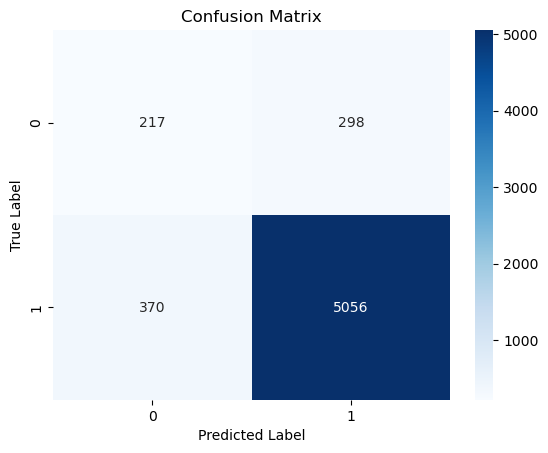

In [76]:
cm = confusion_matrix(y_te, y_pr)

sns.heatmap(cm, annot=True, cmap='Blues', fmt = 'd', cbar=True, xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [46]:
rf = RandomForestClassifier(class_weight={0:8.0, 1:1.0})

params = {'n_estimators': randint(10,100),
          'criterion': ['gini', 'entropy'],
          'max_depth': randint(5,15),
         'max_features': ['sqrt','log2'],
         }


cv = RandomizedSearchCV(rf, param_distributions=params, n_iter=20, \
                       cv = 3, verbose=3, scoring = ['precision','recall','f1'], refit=False)

cv.fit(X_tr_vec, y_tr)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=85; f1: (test=0.955) precision: (test=0.913) recall: (test=1.000) total time=   4.9s
[CV 2/3] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=85; f1: (test=0.955) precision: (test=0.913) recall: (test=1.000) total time=   4.9s
[CV 3/3] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=85; f1: (test=0.955) precision: (test=0.913) recall: (test=1.000) total time=   4.8s
[CV 1/3] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=18; f1: (test=0.954) precision: (test=0.916) recall: (test=0.996) total time=   2.9s
[CV 2/3] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=18; f1: (test=0.955) precision: (test=0.916) recall: (test=0.999) total time=   2.9s
[CV 3/3] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=18; f1: (test=0.955) precision: (test=0.914) recall:

[CV 1/3] END criterion=gini, max_depth=12, max_features=log2, n_estimators=14; f1: (test=0.955) precision: (test=0.915) recall: (test=1.000) total time=   2.9s
[CV 2/3] END criterion=gini, max_depth=12, max_features=log2, n_estimators=14; f1: (test=0.955) precision: (test=0.915) recall: (test=0.999) total time=   0.7s
[CV 3/3] END criterion=gini, max_depth=12, max_features=log2, n_estimators=14; f1: (test=0.955) precision: (test=0.913) recall: (test=1.000) total time=   1.3s
[CV 1/3] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=70; f1: (test=0.955) precision: (test=0.913) recall: (test=1.000) total time=   6.8s
[CV 2/3] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=70; f1: (test=0.955) precision: (test=0.913) recall: (test=1.000) total time=   5.9s
[CV 3/3] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=70; f1: (test=0.955) precision: (test=0.913) recall: (test=1.000) total time=   6.4s
[CV 1/3] END criterion=gini, ma

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight={0: 8.0,
                                                                  1: 1.0}),
                   n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D2E92CB3D0>,
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D2EA12E8D0>},
                   refit=False, scoring=['precision', 'recall', 'f1'],
                   verbose=3)

In [47]:
pd.set_option('display.max_columns', None)

rf_cvdf = pd.DataFrame(cv.cv_results_).sort_values(by='rank_test_f1').reset_index(drop=True)
rf_best = pd.DataFrame(rf_cvdf.iloc[0,:])
display(rf_cvdf)
display(rf_best)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,3.470316,0.487325,0.072464,0.012953,gini,10,sqrt,17,"{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 17}",0.916216,0.916822,0.916032,0.916357,0.000337,2,0.999447,0.999447,0.997236,0.998710,0.001043,18,0.956024,0.956353,0.954910,0.955762,0.000617,1
1,25.116938,1.916908,0.315468,0.038292,entropy,12,sqrt,79,"{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 79}",0.915724,0.916935,0.915414,0.916024,0.000656,3,0.999079,0.998894,0.999263,0.999079,0.000150,17,0.955587,0.956161,0.955503,0.955750,0.000293,2
2,23.819814,3.004425,0.218876,0.027535,gini,10,sqrt,76,"{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 76}",0.915724,0.917132,0.914782,0.915879,0.000965,4,0.999079,0.999447,0.999079,0.999201,0.000174,13,0.955587,0.956522,0.955074,0.955728,0.000599,3
3,33.520652,1.604319,0.363624,0.012792,gini,11,sqrt,97,"{'criterion': 'gini', 'max_depth': 11, 'max_features': 'sqrt', 'n_estimators': 97}",0.915400,0.916216,0.915850,0.915822,0.000334,5,0.998894,0.999631,0.998894,0.999140,0.000347,14,0.955326,0.956108,0.955571,0.955669,0.000326,4
4,12.619896,3.096740,0.180266,0.033734,gini,10,sqrt,42,"{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 42}",0.915695,0.915907,0.915386,0.915663,0.000214,6,0.998710,0.999631,0.998894,0.999079,0.000398,16,0.955403,0.955939,0.955319,0.955554,0.000275,5
5,5.311588,0.464092,0.121826,0.016436,gini,11,sqrt,18,"{'criterion': 'gini', 'max_depth': 11, 'max_features': 'sqrt', 'n_estimators': 18}",0.915891,0.917005,0.916751,0.916549,0.000477,1,0.997236,0.997788,0.998526,0.997850,0.000528,20,0.954834,0.955693,0.955893,0.955473,0.000459,6
6,15.747818,0.698145,0.236698,0.043496,gini,10,sqrt,62,"{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 62}",0.915569,0.915766,0.914334,0.915223,0.000634,8,0.999079,0.999816,0.999263,0.999386,0.000313,11,0.955503,0.955947,0.954914,0.955455,0.000423,7
7,10.610876,1.245431,0.192030,0.034696,entropy,9,sqrt,49,"{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 49}",0.914840,0.916188,0.914194,0.915074,0.000831,10,0.999631,0.999263,0.999447,0.999447,0.000151,10,0.955358,0.955924,0.954922,0.955401,0.000410,8
8,21.843218,1.562404,0.308587,0.055773,entropy,9,sqrt,97,"{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 97}",0.914951,0.916061,0.914628,0.915214,0.000614,9,0.999079,0.999631,0.999079,0.999263,0.000261,12,0.955166,0.956024,0.954990,0.955393,0.000452,9
9,9.673647,2.215738,0.205325,0.035991,entropy,8,sqrt,57,"{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 57}",0.914811,0.915148,0.914238,0.914732,0.000376,12,0.999263,0.999816,1.000000,0.999693,0.000313,8,0.955174,0.955610,0.955198,0.955327,0.000200,10


,0
mean_fit_time,3.470316
std_fit_time,0.487325
mean_score_time,0.072464
std_score_time,0.012953
param_criterion,gini
param_max_depth,10
param_max_features,sqrt
param_n_estimators,17
params,"{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 17}"
split0_test_precision,0.916216


              precision    recall  f1-score   support

           0       0.86      0.06      0.11       515
           1       0.92      1.00      0.96      5426

    accuracy                           0.92      5941
   macro avg       0.89      0.53      0.53      5941
weighted avg       0.91      0.92      0.88      5941



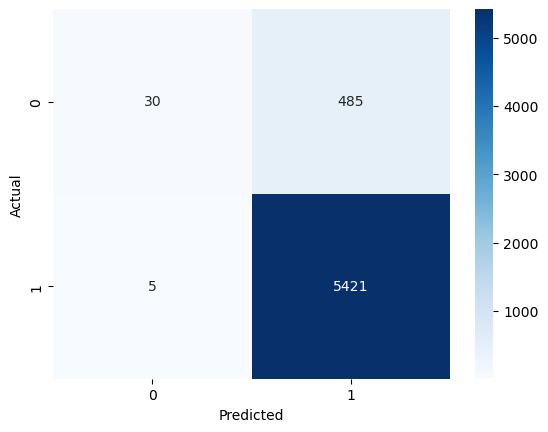

In [50]:
best_rf = RandomForestClassifier(class_weight = {0:8.0, 1:1.0}, criterion='gini', max_depth= 15, max_features= 'sqrt', n_estimators= 50)

best_rf.fit(X_tr_vec, y_tr)
y_pr = best_rf.predict(X_te_vec)

print(classification_report(y_te, y_pr))
sns.heatmap(confusion_matrix(y_te, y_pr), cmap='Blues', cbar=True, annot=True, xticklabels= True, yticklabels=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [163]:
lgbm = lgb.LGBMClassifier(objective='binary', class_weight={0: 5.0, 1: 1.0}, n_estimators=500)

lgbm.fit(X_tr_vec, y_tr)

y_pr = lgbm.predict(X_te_vec)

[LightGBM] [Info] Number of positive: 16279, number of negative: 1544
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.328603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40627
[LightGBM] [Info] Number of data points in the train set: 17823, number of used features: 1999
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678320 -> initscore=0.746062
[LightGBM] [Info] Start training from score 0.746062


              precision    recall  f1-score   support

           0       0.56      0.60      0.58       515
           1       0.96      0.96      0.96      5426

    accuracy                           0.92      5941
   macro avg       0.76      0.78      0.77      5941
weighted avg       0.93      0.92      0.93      5941



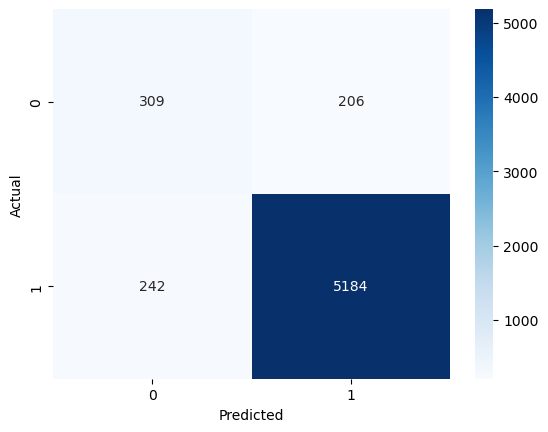

In [137]:
print(classification_report(y_te, y_pr))
sns.heatmap(confusion_matrix(y_te, y_pr), cmap='Blues', cbar=True, annot=True, xticklabels= True, yticklabels=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [147]:
lgbm = lgb.LGBMClassifier(objective='binary')

lgb_cv = RandomizedSearchCV(lgbm, {'class_weight':['balanced', {0: 1.0, 1: 1.0}, {0: 5.0, 1: 1.0}, {0: 1.0, 1: 1.0}, {0: 10.0, 1: 1.0}],
                            'n_estimators': randint(50,500)},\
                            n_iter=10, cv = 3, verbose=3, \
                            scoring = ['precision','recall','f1'], refit=False)

lgb_cv.fit(X_tr_vec, y_tr)   

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 10852, number of negative: 1030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.137540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27949
[LightGBM] [Info] Number of data points in the train set: 11882, number of used features: 1174
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 1/3] END class_weight=balanced, n_estimators=66; f1: (test=0.919) precision: (test=0.976) recall: (test=0.868) total time=   5.5s
[LightGBM] [Info] Number of positive: 10853, number of negative: 1029
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.124740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Inf

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.121066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27949
[LightGBM] [Info] Number of data points in the train set: 11882, number of used features: 1174
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678165 -> initscore=0.745353
[LightGBM] [Info] Start training from score 0.745353
[CV 1/3] END class_weight={0: 5.0, 1: 1.0}, n_estimators=381; f1: (test=0.955) precision: (test=0.958) recall: (test=0.952) total time=  13.4s
[LightGBM] [Info] Number of positive: 10853, number of negative: 1029
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.110685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27569
[LightGBM] [Info] Number of data point

[LightGBM] [Info] Number of positive: 10852, number of negative: 1030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27949
[LightGBM] [Info] Number of data points in the train set: 11882, number of used features: 1174
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 1/3] END class_weight=balanced, n_estimators=112; f1: (test=0.929) precision: (test=0.973) recall: (test=0.889) total time=   5.3s
[LightGBM] [Info] Number of positive: 10853, number of negative: 1029
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.192337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27569
[LightGBM] [Info] Number of data points 

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(objective='binary'),
                   param_distributions={'class_weight': ['balanced',
                                                         {0: 1.0, 1: 1.0},
                                                         {0: 5.0, 1: 1.0},
                                                         {0: 1.0, 1: 1.0},
                                                         {0: 10.0, 1: 1.0}],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001858A71BB90>},
                   refit=False, scoring=['precision', 'recall', 'f1'],
                   verbose=3)

In [150]:
lgbm_cvdf = pd.DataFrame(lgb_cv.cv_results_).sort_values(by='rank_test_f1').reset_index(drop=True)
lgbm_best = pd.DataFrame(lgbm_cvdf.iloc[0,:])
display(lgbm_cvdf)
display(lgbm_best)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_n_estimators,params,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,13.408356,0.773538,0.953348,0.031670,"{0: 5.0, 1: 1.0}",460,"{'class_weight': {0: 5.0, 1: 1.0}, 'n_estimato...",0.955298,0.958085,0.959033,0.957472,0.001585,10,0.956882,0.947844,0.957796,0.954174,0.004492,1,0.956089,0.952937,0.958414,0.955813,0.002245,1
1,12.720309,0.909609,0.827274,0.063750,"{0: 5.0, 1: 1.0}",409,"{'class_weight': {0: 5.0, 1: 1.0}, 'n_estimato...",0.956819,0.958925,0.959157,0.958300,0.001052,9,0.955408,0.946554,0.956506,0.952822,0.004455,2,0.956113,0.952699,0.957830,0.955547,0.002132,2
2,11.513864,0.853734,0.747392,0.029642,"{0: 5.0, 1: 1.0}",381,"{'class_weight': {0: 5.0, 1: 1.0}, 'n_estimato...",0.957545,0.959753,0.959459,0.958919,0.000979,8,0.951723,0.944895,0.955216,0.950611,0.004286,3,0.954625,0.952266,0.957333,0.954741,0.002070,3
3,10.077706,1.299400,0.728233,0.207451,"{0: 5.0, 1: 1.0}",282,"{'class_weight': {0: 5.0, 1: 1.0}, 'n_estimato...",0.959588,0.961669,0.963463,0.961573,0.001583,7,0.945089,0.938629,0.947659,0.943793,0.003799,4,0.952284,0.950009,0.955496,0.952596,0.002251,4
4,8.023707,1.039626,0.337143,0.005560,"{0: 5.0, 1: 1.0}",145,"{'class_weight': {0: 5.0, 1: 1.0}, 'n_estimato...",0.964374,0.966647,0.966997,0.966006,0.001163,4,0.932744,0.924069,0.934206,0.930340,0.004474,6,0.948295,0.944879,0.950319,0.947831,0.002245,5
5,10.696121,0.353304,0.667800,0.014865,balanced,388,"{'class_weight': 'balanced', 'n_estimators': 388}",0.960516,0.964416,0.965169,0.963367,0.002039,6,0.932375,0.924069,0.934574,0.930340,0.004524,5,0.946237,0.943812,0.949625,0.946558,0.002384,6
6,10.755256,1.178632,0.662893,0.068948,balanced,319,"{'class_weight': 'balanced', 'n_estimators': 319}",0.961649,0.966105,0.966520,0.964758,0.002205,5,0.928690,0.919278,0.931073,0.926347,0.005092,7,0.944882,0.942110,0.948465,0.945152,0.002602,7
7,5.837220,0.732855,0.221988,0.014651,"{0: 5.0, 1: 1.0}",80,"{'class_weight': {0: 5.0, 1: 1.0}, 'n_estimato...",0.967516,0.972731,0.971006,0.970418,0.002169,3,0.916528,0.900663,0.919646,0.912279,0.008312,8,0.941332,0.935311,0.944628,0.940424,0.003858,8
8,5.882831,0.674751,0.238767,0.036211,balanced,112,"{'class_weight': 'balanced', 'n_estimators': 112}",0.973376,0.975896,0.973854,0.974375,0.001093,2,0.889257,0.873019,0.892370,0.884882,0.008484,9,0.929417,0.921595,0.931333,0.927449,0.004212,9
9,5.054953,0.531393,0.164447,0.035959,balanced,66,"{'class_weight': 'balanced', 'n_estimators': 66}",0.976176,0.978814,0.978351,0.977780,0.001150,1,0.868251,0.851456,0.874493,0.864733,0.009728,10,0.919056,0.910704,0.923511,0.917757,0.005309,10


,0
mean_fit_time,13.408356
std_fit_time,0.773538
mean_score_time,0.953348
std_score_time,0.03167
param_class_weight,"{0: 5.0, 1: 1.0}"
param_n_estimators,460
params,"{'class_weight': {0: 5.0, 1: 1.0}, 'n_estimato..."
split0_test_precision,0.955298
split1_test_precision,0.958085
split2_test_precision,0.959033


In [160]:
pd.set_option('display.max_colwidth', None)
print(lgbm_best.loc[['params', 'mean_test_precision','mean_test_recall','mean_test_f1'],:])

                                                                           0
params               {'class_weight': {0: 5.0, 1: 1.0}, 'n_estimators': 460}
mean_test_precision                                                 0.957472
mean_test_recall                                                    0.954174
mean_test_f1                                                        0.955813


In [168]:
svc = LinearSVC(class_weight='balanced', max_iter=5000)

svc.fit(X_tr_vec, y_tr)

y_pr = svc.predict(X_te_vec)

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.45      0.56      0.50       515
           1       0.96      0.94      0.95      5426

    accuracy                           0.90      5941
   macro avg       0.70      0.75      0.72      5941
weighted avg       0.91      0.90      0.91      5941



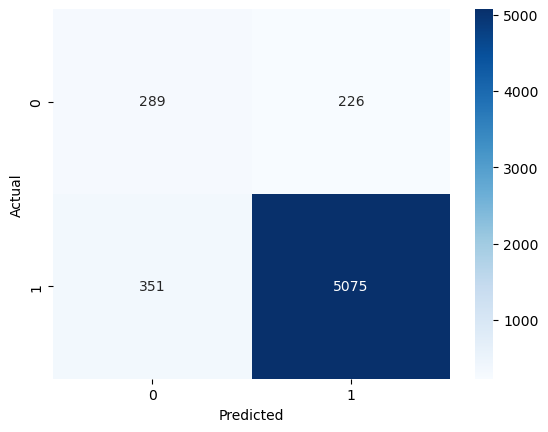

In [169]:
print(classification_report(y_te, y_pr))
sns.heatmap(confusion_matrix(y_te, y_pr), cmap='Blues', cbar=True, annot=True, xticklabels= True, yticklabels=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [8]:
svc = LinearSVC(dual='auto')

svc_cv = GridSearchCV(svc, {'class_weight':['balanced', {0: 1.0, 1: 1.0}, {0: 5.0, 1: 1.0}, {0: 1.0, 1: 1.0}, {0: 10.0, 1: 1.0}],
                           'max_iter': [1000,2500,5000],
                           'C':[0.1, 1, 10.0]},
                           cv = 3, verbose=3, \
                            scoring = ['precision','recall','f1'], refit=False)

svc_cv.fit(X_tr_vec, y_tr)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END C=0.1, class_weight=balanced, max_iter=1000; f1: (test=0.916) precision: (test=0.973) recall: (test=0.866) total time=   2.4s
[CV 2/3] END C=0.1, class_weight=balanced, max_iter=1000; f1: (test=0.901) precision: (test=0.977) recall: (test=0.837) total time=   1.7s
[CV 3/3] END C=0.1, class_weight=balanced, max_iter=1000; f1: (test=0.921) precision: (test=0.975) recall: (test=0.873) total time=   1.6s
[CV 1/3] END C=0.1, class_weight=balanced, max_iter=2500; f1: (test=0.916) precision: (test=0.973) recall: (test=0.866) total time=   1.4s
[CV 2/3] END C=0.1, class_weight=balanced, max_iter=2500; f1: (test=0.901) precision: (test=0.977) recall: (test=0.837) total time=   1.5s
[CV 3/3] END C=0.1, class_weight=balanced, max_iter=2500; f1: (test=0.921) precision: (test=0.975) recall: (test=0.873) total time=   1.5s
[CV 1/3] END C=0.1, class_weight=balanced, max_iter=5000; f1: (test=0.916) precision: (test=0.973) recal

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=1, class_weight=balanced, max_iter=1000; f1: (test=0.952) precision: (test=0.949) recall: (test=0.955) total time=   5.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=1, class_weight=balanced, max_iter=1000; f1: (test=0.952) precision: (test=0.951) recall: (test=0.953) total time=   4.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=1, class_weight=balanced, max_iter=1000; f1: (test=0.951) precision: (test=0.952) recall: (test=0.950) total time=   3.9s
[CV 1/3] END C=1, class_weight=balanced, max_iter=2500; f1: (test=0.952) precision: (test=0.949) recall: (test=0.955) total time=   3.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=1, class_weight=balanced, max_iter=2500; f1: (test=0.952) precision: (test=0.951) recall: (test=0.953) total time=  10.2s
[CV 3/3] END C=1, class_weight=balanced, max_iter=2500; f1: (test=0.951) precision: (test=0.952) recall: (test=0.950) total time=   5.7s
[CV 1/3] END C=1, class_weight=balanced, max_iter=5000; f1: (test=0.952) precision: (test=0.949) recall: (test=0.955) total time=   3.1s
[CV 2/3] END C=1, class_weight=balanced, max_iter=5000; f1: (test=0.952) precision: (test=0.951) recall: (test=0.953) total time=  10.4s
[CV 3/3] END C=1, class_weight=balanced, max_iter=5000; f1: (test=0.951) precision: (test=0.952) recall: (test=0.950) total time=  11.9s
[CV 1/3] END C=1, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.965) precision: (test=0.941) recall: (test=0.991) total time=   2.7s
[CV 2/3] END C=1, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.966) precision: (test=0.942) recall: (test=0.992) total time=   2.7s
[CV 3/3] END C=1, class_w

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=1000; f1: (test=0.958) precision: (test=0.948) recall: (test=0.967) total time=   2.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=1000; f1: (test=0.956) precision: (test=0.948) recall: (test=0.965) total time=   3.5s
[CV 1/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=2500; f1: (test=0.957) precision: (test=0.946) recall: (test=0.968) total time=   2.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=2500; f1: (test=0.958) precision: (test=0.948) recall: (test=0.968) total time=   9.1s
[CV 3/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=2500; f1: (test=0.956) precision: (test=0.948) recall: (test=0.965) total time=   7.9s
[CV 1/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=5000; f1: (test=0.957) precision: (test=0.946) recall: (test=0.968) total time=   4.1s
[CV 2/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=5000; f1: (test=0.958) precision: (test=0.948) recall: (test=0.968) total time=  10.1s
[CV 3/3] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=5000; f1: (test=0.956) precision: (test=0.948) recall: (test=0.965) total time=   6.9s
[CV 1/3] END C=1, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.965) precision: (test=0.941) recall: (test=0.991) total time=   0.8s
[CV 2/3] END C=1, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.966) precision: (test=0.942) recall: (test=0.992) tota

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=1000; f1: (test=0.953) precision: (test=0.948) recall: (test=0.958) total time=   2.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=1000; f1: (test=0.952) precision: (test=0.948) recall: (test=0.956) total time=   2.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=1000; f1: (test=0.951) precision: (test=0.949) recall: (test=0.953) total time=   2.6s
[CV 1/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=2500; f1: (test=0.953) precision: (test=0.948) recall: (test=0.958) total time=   4.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=2500; f1: (test=0.952) precision: (test=0.948) recall: (test=0.957) total time=   4.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=2500; f1: (test=0.951) precision: (test=0.949) recall: (test=0.953) total time=   6.2s
[CV 1/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=5000; f1: (test=0.953) precision: (test=0.948) recall: (test=0.958) total time=   5.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=5000; f1: (test=0.952) precision: (test=0.948) recall: (test=0.956) total time=  19.5s
[CV 3/3] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=5000; f1: (test=0.951) precision: (test=0.949) recall: (test=0.953) total time=  13.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight=balanced, max_iter=1000; f1: (test=0.949) precision: (test=0.946) recall: (test=0.953) total time=   3.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight=balanced, max_iter=1000; f1: (test=0.952) precision: (test=0.947) recall: (test=0.957) total time=   2.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight=balanced, max_iter=1000; f1: (test=0.952) precision: (test=0.949) recall: (test=0.956) total time=   2.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight=balanced, max_iter=2500; f1: (test=0.948) precision: (test=0.946) recall: (test=0.950) total time=   4.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight=balanced, max_iter=2500; f1: (test=0.951) precision: (test=0.946) recall: (test=0.957) total time=   4.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight=balanced, max_iter=2500; f1: (test=0.952) precision: (test=0.949) recall: (test=0.955) total time=   4.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight=balanced, max_iter=5000; f1: (test=0.948) precision: (test=0.946) recall: (test=0.951) total time=   9.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight=balanced, max_iter=5000; f1: (test=0.951) precision: (test=0.947) recall: (test=0.956) total time=  13.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight=balanced, max_iter=5000; f1: (test=0.952) precision: (test=0.949) recall: (test=0.955) total time=  14.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.962) precision: (test=0.942) recall: (test=0.983) total time=   1.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.962) precision: (test=0.944) recall: (test=0.981) total time=   1.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.961) precision: (test=0.944) recall: (test=0.979) total time=   1.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2500; f1: (test=0.962) precision: (test=0.942) recall: (test=0.983) total time=   4.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2500; f1: (test=0.962) precision: (test=0.944) recall: (test=0.981) total time=   5.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2500; f1: (test=0.962) precision: (test=0.945) recall: (test=0.979) total time=   5.7s
[CV 1/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=5000; f1: (test=0.962) precision: (test=0.942) recall: (test=0.983) total time=   6.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=5000; f1: (test=0.962) precision: (test=0.944) recall: (test=0.981) total time=  10.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=5000; f1: (test=0.962) precision: (test=0.945) recall: (test=0.979) total time=   9.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=1000; f1: (test=0.950) precision: (test=0.944) recall: (test=0.957) total time=   2.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=1000; f1: (test=0.955) precision: (test=0.947) recall: (test=0.963) total time=   2.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=1000; f1: (test=0.954) precision: (test=0.948) recall: (test=0.961) total time=   3.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=2500; f1: (test=0.949) precision: (test=0.944) recall: (test=0.954) total time=   6.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=2500; f1: (test=0.955) precision: (test=0.947) recall: (test=0.962) total time=   4.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=2500; f1: (test=0.954) precision: (test=0.948) recall: (test=0.960) total time=   4.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=5000; f1: (test=0.949) precision: (test=0.944) recall: (test=0.954) total time=  14.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=5000; f1: (test=0.954) precision: (test=0.947) recall: (test=0.962) total time=  24.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=5000; f1: (test=0.954) precision: (test=0.948) recall: (test=0.960) total time=  11.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.962) precision: (test=0.942) recall: (test=0.983) total time=   1.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.962) precision: (test=0.944) recall: (test=0.981) total time=   2.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=1000; f1: (test=0.961) precision: (test=0.944) recall: (test=0.979) total time=   2.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2500; f1: (test=0.962) precision: (test=0.942) recall: (test=0.983) total time=   5.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2500; f1: (test=0.962) precision: (test=0.944) recall: (test=0.981) total time=   5.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2500; f1: (test=0.962) precision: (test=0.945) recall: (test=0.979) total time=   5.6s
[CV 1/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=5000; f1: (test=0.962) precision: (test=0.942) recall: (test=0.983) total time=   5.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=5000; f1: (test=0.962) precision: (test=0.944) recall: (test=0.981) total time=   9.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=5000; f1: (test=0.962) precision: (test=0.945) recall: (test=0.979) total time=  17.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1000; f1: (test=0.947) precision: (test=0.945) recall: (test=0.948) total time=   3.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1000; f1: (test=0.952) precision: (test=0.947) recall: (test=0.958) total time=   3.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1000; f1: (test=0.951) precision: (test=0.949) recall: (test=0.953) total time=   2.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=2500; f1: (test=0.944) precision: (test=0.945) recall: (test=0.944) total time=   4.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=2500; f1: (test=0.951) precision: (test=0.946) recall: (test=0.956) total time=   5.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=2500; f1: (test=0.951) precision: (test=0.949) recall: (test=0.952) total time=   4.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=5000; f1: (test=0.944) precision: (test=0.945) recall: (test=0.943) total time=   8.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=5000; f1: (test=0.950) precision: (test=0.945) recall: (test=0.955) total time=   8.4s
[CV 3/3] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=5000; f1: (test=0.951) precision: (test=0.950) recall: (test=0.951) total time=  11.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=3, estimator=LinearSVC(dual='auto'),
             param_grid={'C': [0.1, 1, 10.0],
                         'class_weight': ['balanced', {0: 1.0, 1: 1.0},
                                          {0: 5.0, 1: 1.0}, {0: 1.0, 1: 1.0},
                                          {0: 10.0, 1: 1.0}],
                         'max_iter': [1000, 2500, 5000]},
             refit=False, scoring=['precision', 'recall', 'f1'], verbose=3)

In [10]:
svc_cvdf = pd.DataFrame(svc_cv.cv_results_).sort_values(by='rank_test_f1').reset_index(drop=True)
svc_best = pd.DataFrame(svc_cvdf.iloc[0,:])
display(svc_cvdf)
display(svc_best)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_max_iter,params,split0_test_precision,split1_test_precision,...,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,2.649263,0.144584,0.027297,0.006587,1,"{0: 1.0, 1: 1.0}",1000,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 1000}",0.941043,0.941557,...,0.990601,0.991154,0.000451,7,0.965449,0.965982,0.964904,0.965445,0.000440,1
1,1.335717,0.287607,0.025812,0.015654,1,"{0: 1.0, 1: 1.0}",1000,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 1000}",0.941043,0.941557,...,0.990601,0.991154,0.000451,7,0.965449,0.965982,0.964904,0.965445,0.000440,1
2,1.592869,0.239610,0.025776,0.007437,1,"{0: 1.0, 1: 1.0}",2500,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 2500}",0.941043,0.941557,...,0.990601,0.991154,0.000451,7,0.965449,0.965982,0.964904,0.965445,0.000440,1
3,1.477117,0.176543,0.027305,0.009494,1,"{0: 1.0, 1: 1.0}",5000,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 5000}",0.941043,0.941557,...,0.990601,0.991154,0.000451,7,0.965449,0.965982,0.964904,0.965445,0.000440,1
4,1.403068,0.331300,0.027555,0.004213,1,"{0: 1.0, 1: 1.0}",5000,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 5000}",0.941043,0.941557,...,0.990601,0.991154,0.000451,7,0.965449,0.965982,0.964904,0.965445,0.000440,1
5,1.585148,0.289189,0.024945,0.005682,1,"{0: 1.0, 1: 1.0}",2500,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 2500}",0.941043,0.941557,...,0.990601,0.991154,0.000451,7,0.965449,0.965982,0.964904,0.965445,0.000440,1
6,0.178408,0.010019,0.017858,0.000091,0.1,"{0: 1.0, 1: 1.0}",2500,"{'C': 0.1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 2500}",0.935211,0.932358,...,0.997788,0.997850,0.000379,1,0.965314,0.964222,0.964461,0.964666,0.000469,7
7,0.189866,0.011016,0.018092,0.002041,0.1,"{0: 1.0, 1: 1.0}",1000,"{'C': 0.1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 1000}",0.935211,0.932358,...,0.997788,0.997850,0.000379,1,0.965314,0.964222,0.964461,0.964666,0.000469,7
8,0.175018,0.011330,0.022321,0.001986,0.1,"{0: 1.0, 1: 1.0}",2500,"{'C': 0.1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 2500}",0.935211,0.932358,...,0.997788,0.997850,0.000379,1,0.965314,0.964222,0.964461,0.964666,0.000469,7
9,0.192559,0.016034,0.023056,0.001317,0.1,"{0: 1.0, 1: 1.0}",5000,"{'C': 0.1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 5000}",0.935211,0.932358,...,0.997788,0.997850,0.000379,1,0.965314,0.964222,0.964461,0.964666,0.000469,7


,0
mean_fit_time,2.649263
std_fit_time,0.144584
mean_score_time,0.027297
std_score_time,0.006587
param_C,1
param_class_weight,"{0: 1.0, 1: 1.0}"
param_max_iter,1000
params,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 1000}"
split0_test_precision,0.941043
split1_test_precision,0.941557


In [11]:
pd.set_option('display.max_colwidth', None)
print(svc_best.loc[['params', 'mean_test_precision','mean_test_recall','mean_test_f1'],:])

                                                                                0
params               {'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 1000}
mean_test_precision                                                      0.941036
mean_test_recall                                                         0.991154
mean_test_f1                                                             0.965445


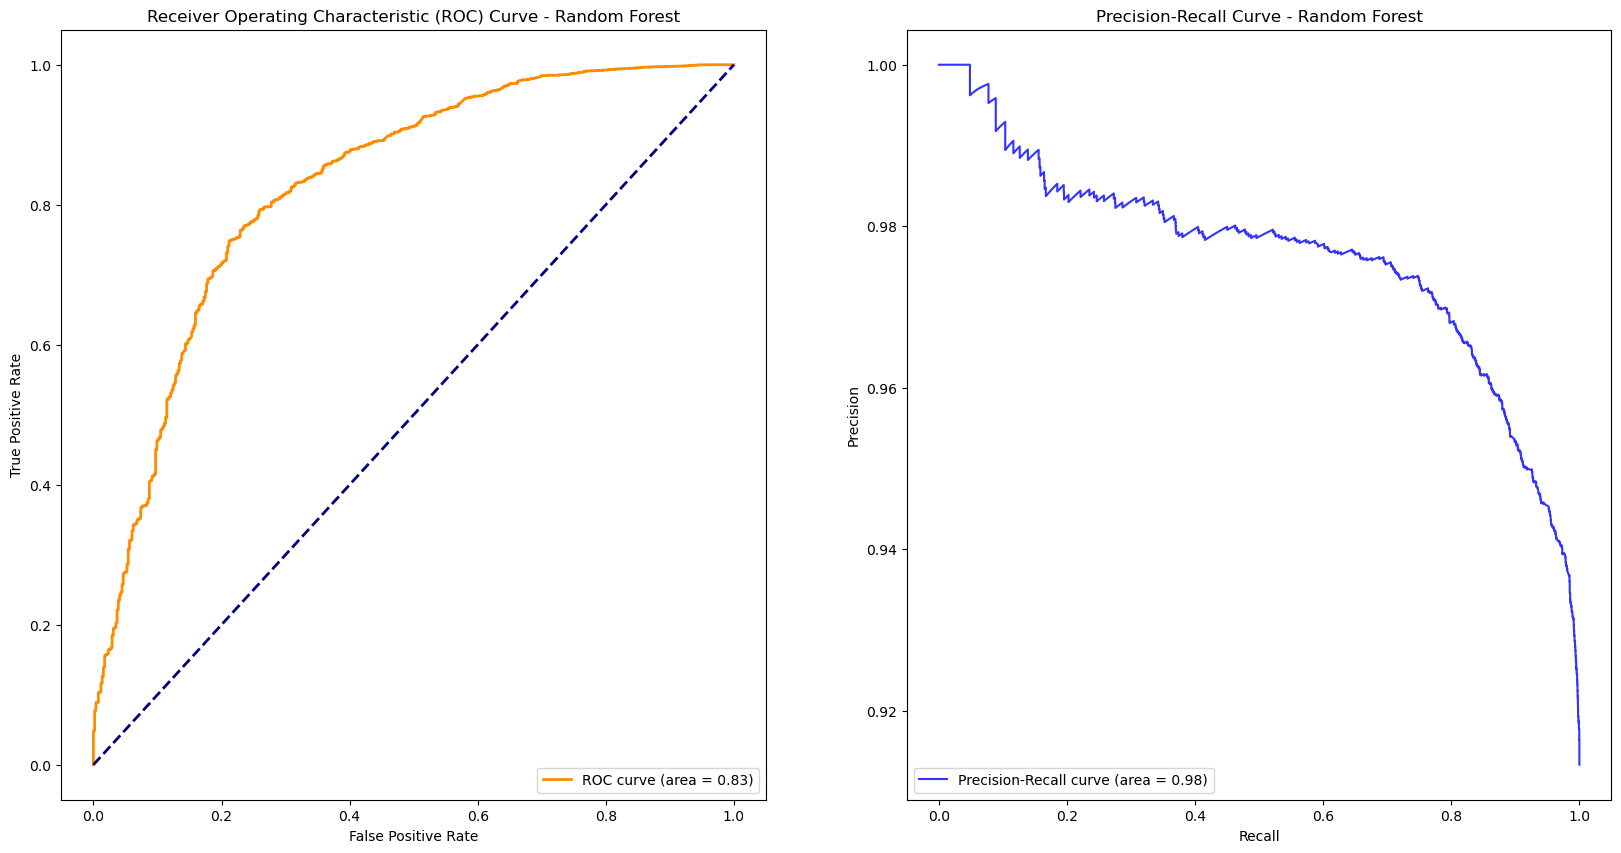

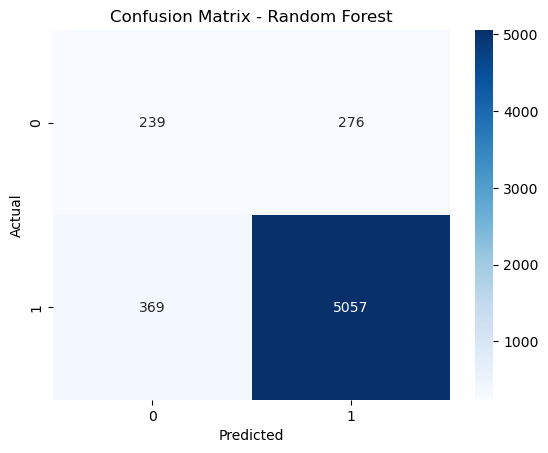

**************************************************
Classifcation Report - Random Forest
**************************************************
              precision    recall  f1-score   support

           0       0.39      0.46      0.43       515
           1       0.95      0.93      0.94      5426

    accuracy                           0.89      5941
   macro avg       0.67      0.70      0.68      5941
weighted avg       0.90      0.89      0.90      5941



In [45]:
best_rf = RandomForestClassifier(class_weight={0:10.0, 1:1.0}, criterion= 'entropy', max_depth= 5, \
                                 max_features= 'log2', n_estimators= 57)
maybe_rf = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight={0:10.0, 1:1.0})

maybe_rf.fit(X_tr_vec, y_tr)
y_pr = maybe_rf.predict(X_te_vec)
y_prob = maybe_rf.predict_proba(X_te_vec)

fpr, tpr, thresholds = roc_curve(y_te, y_prob[:,1])
roc_auc = auc(fpr, tpr)

precision, recall, pthresholds = precision_recall_curve(y_te, y_prob[:, 1])
pr_auc = auc(recall, precision)

fig, ax = plt.subplots(1,2, figsize=(20,10))
# Plot ROC curve

ax[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
ax[0].legend(loc="lower right")

# Plot Precision-Recall curve
ax[1].plot(recall, precision, color='b', alpha=0.8, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve - Random Forest')
ax[1].legend(loc='lower left')

plt.show();
# Classification report


sns.heatmap(confusion_matrix(y_te, y_pr), cmap='Blues', cbar=True, annot=True, xticklabels= True, yticklabels=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')

plt.show();

print('*'*50)
print('Classifcation Report - Random Forest')
print('*'*50)
print(classification_report(y_te, y_pr))

[LightGBM] [Info] Number of positive: 16279, number of negative: 1544
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.150752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40627
[LightGBM] [Info] Number of data points in the train set: 17823, number of used features: 1999
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678320 -> initscore=0.746062
[LightGBM] [Info] Start training from score 0.746062


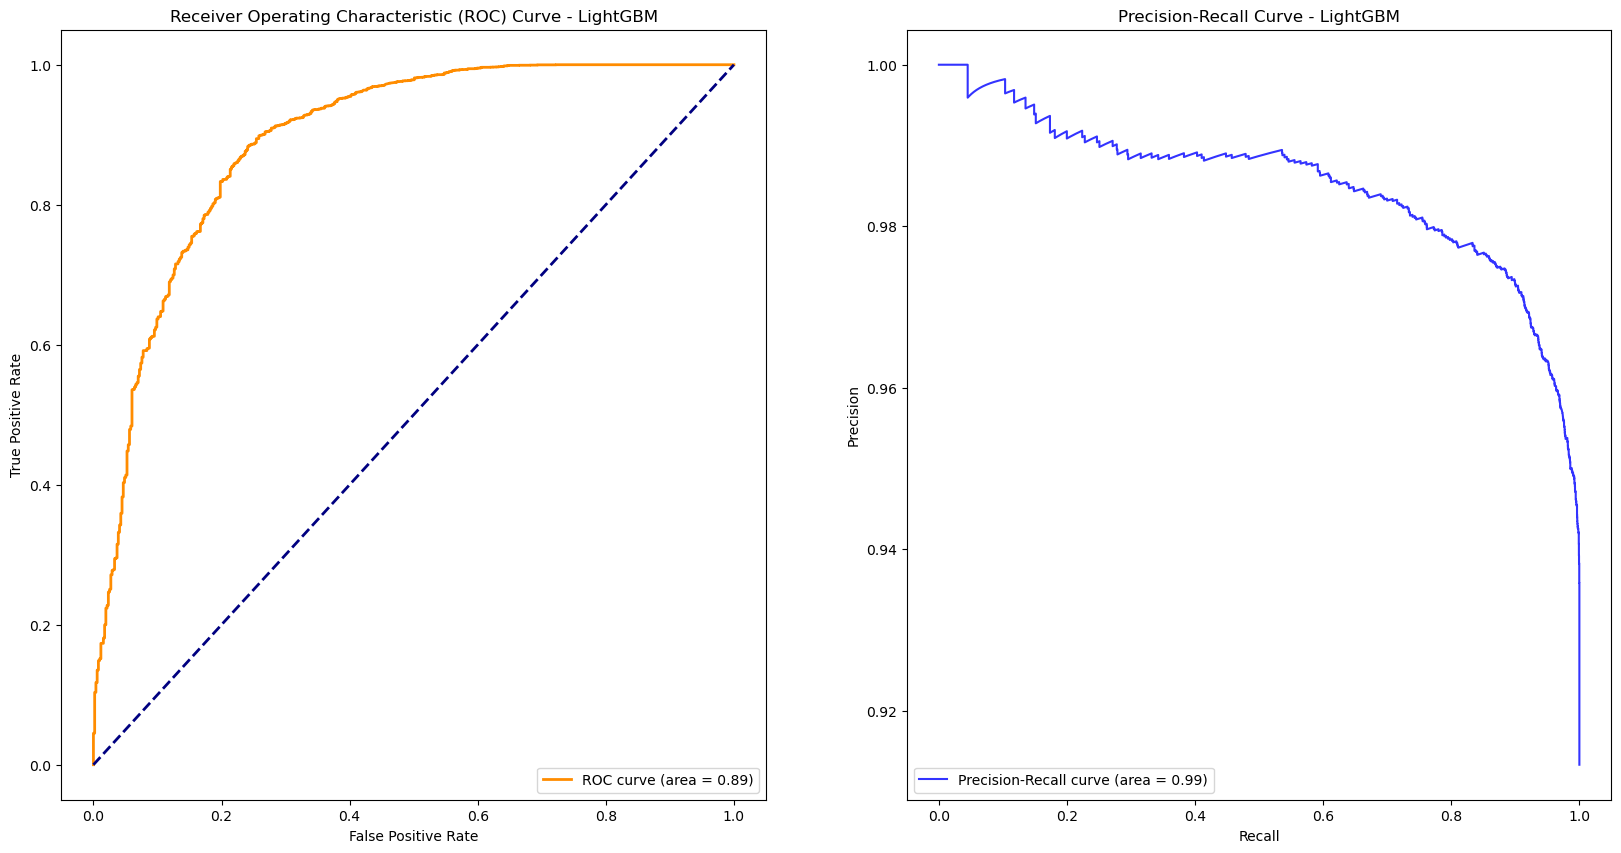

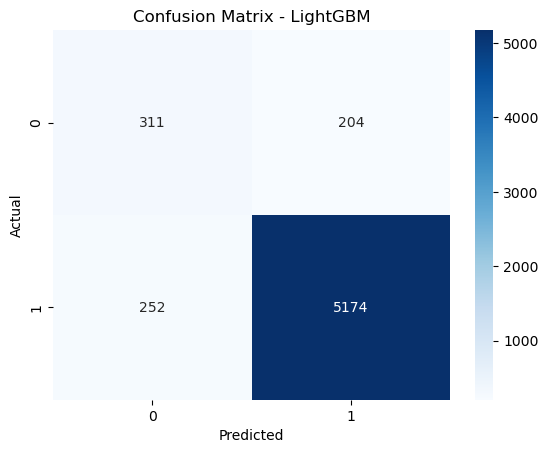

**************************************************
Classifcation Report - LightGBM
**************************************************
              precision    recall  f1-score   support

           0       0.55      0.60      0.58       515
           1       0.96      0.95      0.96      5426

    accuracy                           0.92      5941
   macro avg       0.76      0.78      0.77      5941
weighted avg       0.93      0.92      0.92      5941



In [42]:
best_lgbm = lgb.LGBMClassifier(objective='binary',class_weight= {0: 5.0, 1: 1.0}, n_estimators= 460)

best_lgbm.fit(X_tr_vec, y_tr)
y_pr = best_lgbm.predict(X_te_vec)
y_prob = best_lgbm.predict_proba(X_te_vec)

fpr, tpr, thresholds = roc_curve(y_te, y_prob[:,1])
roc_auc = auc(fpr, tpr)

precision, recall, pthresholds = precision_recall_curve(y_te, y_prob[:, 1])
pr_auc = auc(recall, precision)

fig, ax = plt.subplots(1,2, figsize=(20,10))
# Plot ROC curve

ax[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Receiver Operating Characteristic (ROC) Curve - LightGBM')
ax[0].legend(loc="lower right")

# Plot Precision-Recall curve
ax[1].plot(recall, precision, color='b', alpha=0.8, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve - LightGBM')
ax[1].legend(loc='lower left')

plt.show();
# Classification report


sns.heatmap(confusion_matrix(y_te, y_pr), cmap='Blues', cbar=True, annot=True, xticklabels= True, yticklabels=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')

plt.show();

print('*'*50)
print('Classifcation Report - LightGBM')
print('*'*50)
print(classification_report(y_te, y_pr))

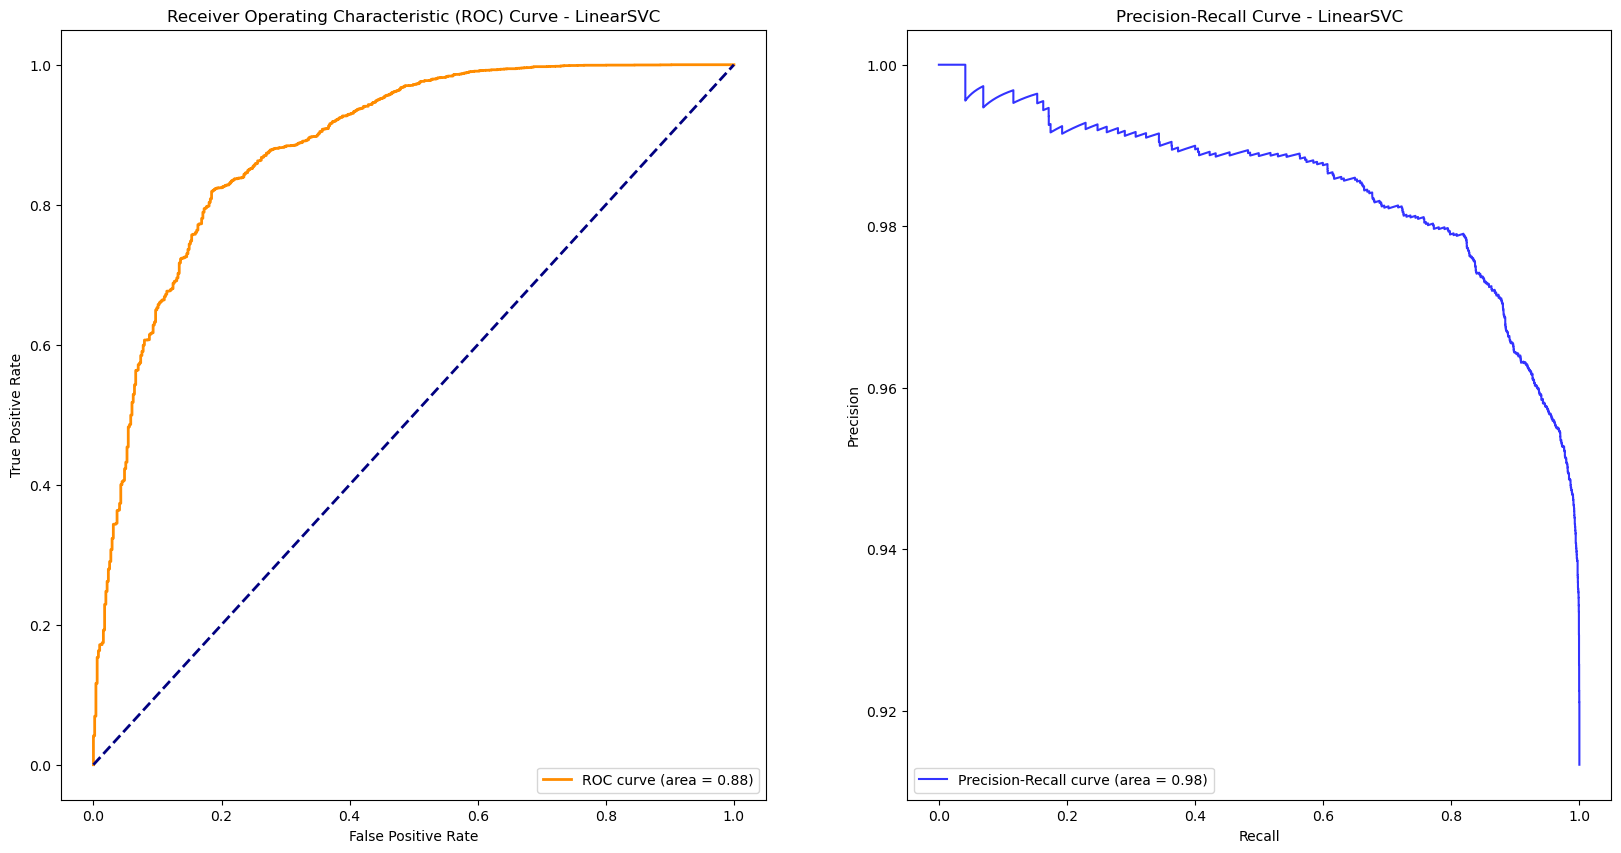

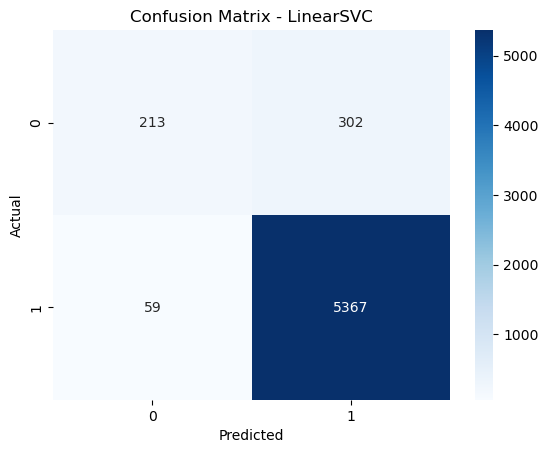

**************************************************
Classifcation Report - LinearSVC
**************************************************
              precision    recall  f1-score   support

           0       0.78      0.41      0.54       515
           1       0.95      0.99      0.97      5426

    accuracy                           0.94      5941
   macro avg       0.86      0.70      0.75      5941
weighted avg       0.93      0.94      0.93      5941



In [44]:
best_svc = LinearSVC(dual='auto', C= 1, class_weight= {0: 1.0, 1: 1.0}, max_iter= 1000)

clf = CalibratedClassifierCV(best_svc) 
clf.fit(X_tr_vec, y_tr)
y_pr = clf.predict(X_te_vec)
y_prob = clf.predict_proba(X_te_vec)

fpr, tpr, thresholds = roc_curve(y_te, y_prob[:,1])
roc_auc = auc(fpr, tpr)


precision, recall, pthresholds = precision_recall_curve(y_te, y_prob[:, 1])
pr_auc = auc(recall, precision)

fig, ax = plt.subplots(1,2, figsize=(20,10))
# Plot ROC curve

ax[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Receiver Operating Characteristic (ROC) Curve - LinearSVC')
ax[0].legend(loc="lower right")

# Plot Precision-Recall curve
ax[1].plot(recall, precision, color='b', alpha=0.8, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve - LinearSVC')
ax[1].legend(loc='lower left')

plt.show();
# Classification report


sns.heatmap(confusion_matrix(y_te, y_pr), cmap='Blues', cbar=True, annot=True, xticklabels= True, yticklabels=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LinearSVC')

plt.show();

print('*'*50)
print('Classifcation Report - LinearSVC')
print('*'*50)
print(classification_report(y_te, y_pr))

### Well this is a tight race. Looks like Light Gradient Boosting Machine and Linear Support Vector Machine are both going for gold on this one. It's a tough day for Random Forest, but he'll be alright with a bronze trophy. 

### A quick note on what we're looking for here:

#### The goal of this model is to identify the most likely context surrounding a successful terrorist incident given a certain motive. In this case, I don't want to miss True incidents, and it's alright if I call a few cases true when they are not. I'd much rather be overprepared than underprepared in this situation. Thus, I'm looking to optimize recall on the positive (1) class. 

#### However, I can't optimize recall on the positive class too much, as then the model will not be useful - it will tell us we need to prepare more for events that are less likely to be successful than for events that are truly likely to be successful. That's not good either. So, I'm also accounting for the weighted avg of recall. 

#### Lastly, of course I want to identify true positives and true negatives on the positive class correctly.

### As it is, I think it's too close to tell between LightGBM and LinearSVC as they are not fully optimized yet. The next step is to perform extensive CV on both and evaluate the metrics again.

In [3]:
lgbm = lgb.LGBMClassifier(objective='binary')

lgb_cv = RandomizedSearchCV(lgbm, {'class_weight':['balanced', {0: 1.0, 1: 1.0}, {0: 5.0, 1: 1.0}, {0: 1.0, 1: 1.0}, {0: 10.0, 1: 1.0}],
                            'n_estimators': randint(50,1000)},\
                            n_iter=60, cv = 5, verbose=3, \
                            scoring = ['precision','recall','f1'], refit=False)

lgb_cv.fit(X_tr_vec, y_tr)   

lgbm_cvdf = pd.DataFrame(lgb_cv.cv_results_).sort_values(by='rank_test_f1').reset_index(drop=True)
lgbm_best = pd.DataFrame(lgbm_cvdf.iloc[0,:])
display(lgbm_cvdf)
display(lgbm_best)

pd.set_option('display.max_colwidth', None)
print(lgbm_best.loc[['params', 'mean_test_precision','mean_test_recall','mean_test_f1'],:])

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.099959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33320
[LightGBM] [Info] Number of data points in the train set: 14258, number of used features: 1524
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678352 -> initscore=0.746208
[LightGBM] [Info] Start training from score 0.746208
[CV 1/5] END class_weight={0: 5.0, 1: 1.0}, n_estimators=918; f1: (test=0.959) precision: (test=0.952) recall: (test=0.966) total time=  12.6s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And i

[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33000
[LightGBM] [Info] Number of data points in the train set: 14258, number of used features: 1509
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.913382 -> initscore=2.355646
[LightGBM] [Info] Start training from score 2.355646
[CV 3/5] END class_weight={0: 1.0, 1: 1.0}, n_estimators=715; f1: (test=0.969) precision: (test=0.951) recall: (test=0.988) total time=  10.1s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1236
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33164
[LightGBM] [Info] Number of data points in the train set: 14259, number of used features: 1500
[

[LightGBM] [Info] Total Bins 33241
[LightGBM] [Info] Number of data points in the train set: 14259, number of used features: 1487
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV 5/5] END class_weight=balanced, n_estimators=212; f1: (test=0.937) precision: (test=0.974) recall: (test=0.902) total time=   4.3s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33320
[LightGBM] [Info] Number of data points in the train set: 14258, number of used features: 1524
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV 1/5] END class_weight=balanced, n_est

[CV 3/5] END class_weight={0: 5.0, 1: 1.0}, n_estimators=346; f1: (test=0.955) precision: (test=0.966) recall: (test=0.944) total time=   5.7s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1236
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.109310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33164
[LightGBM] [Info] Number of data points in the train set: 14259, number of used features: 1500
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678175 -> initscore=0.745399
[LightGBM] [Info] Start training from score 0.745399
[CV 4/5] END class_weight={0: 5.0, 1: 1.0}, n_estimators=346; f1: (test=0.956) precision: (test=0.961) recall: (test=0.951) total time=   5.1s
[LightGBM] [Info] Number of positive: 13024, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061057 seconds.
You can set `force_row_wise=true` to remove th

[CV 1/5] END class_weight=balanced, n_estimators=472; f1: (test=0.946) precision: (test=0.959) recall: (test=0.933) total time=   7.5s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33478
[LightGBM] [Info] Number of data points in the train set: 14258, number of used features: 1522
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV 2/5] END class_weight=balanced, n_estimators=472; f1: (test=0.947) precision: (test=0.961) recall: (test=0.934) total time=   7.1s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085125 secon

[LightGBM] [Info] Number of positive: 13023, number of negative: 1236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33164
[LightGBM] [Info] Number of data points in the train set: 14259, number of used features: 1500
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513060 -> initscore=0.052252
[LightGBM] [Info] Start training from score 0.052252
[CV 4/5] END class_weight={0: 10.0, 1: 1.0}, n_estimators=278; f1: (test=0.945) precision: (test=0.967) recall: (test=0.923) total time=   4.8s
[LightGBM] [Info] Number of positive: 13024, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.096176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[L

[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33320
[LightGBM] [Info] Number of data points in the train set: 14258, number of used features: 1524
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV 1/5] END class_weight=balanced, n_estimators=765; f1: (test=0.950) precision: (test=0.956) recall: (test=0.944) total time=   9.4s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.102445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM

[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33000
[LightGBM] [Info] Number of data points in the train set: 14258, number of used features: 1509
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.913382 -> initscore=2.355646
[LightGBM] [Info] Start training from score 2.355646
[CV 3/5] END class_weight={0: 1.0, 1: 1.0}, n_estimators=167; f1: (test=0.970) precision: (test=0.950) recall: (test=0.990) total time=   3.7s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.093155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Li

[CV 4/5] END class_weight={0: 5.0, 1: 1.0}, n_estimators=436; f1: (test=0.957) precision: (test=0.959) recall: (test=0.955) total time=   7.0s
[LightGBM] [Info] Number of positive: 13024, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33241
[LightGBM] [Info] Number of data points in the train set: 14259, number of used features: 1487
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678369 -> initscore=0.746285
[LightGBM] [Info] Start training from score 0.746285
[CV 5/5] END class_weight={0: 5.0, 1: 1.0}, n_estimators=436; f1: (test=0.957) precision: (test=0.963) recall: (test=0.950) total time=   6.5s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 

[CV 1/5] END class_weight={0: 10.0, 1: 1.0}, n_estimators=59; f1: (test=0.913) precision: (test=0.980) recall: (test=0.855) total time=   2.3s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33478
[LightGBM] [Info] Number of data points in the train set: 14258, number of used features: 1522
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513262 -> initscore=0.053061
[LightGBM] [Info] Start training from score 0.053061
[CV 2/5] END class_weight={0: 10.0, 1: 1.0}, n_estimators=59; f1: (test=0.912) precision: (test=0.975) recall: (test=0.856) total time=   2.2s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 

[CV 3/5] END class_weight={0: 10.0, 1: 1.0}, n_estimators=609; f1: (test=0.949) precision: (test=0.961) recall: (test=0.937) total time=   7.4s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1236
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33164
[LightGBM] [Info] Number of data points in the train set: 14259, number of used features: 1500
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513060 -> initscore=0.052252
[LightGBM] [Info] Start training from score 0.052252
[CV 4/5] END class_weight={0: 10.0, 1: 1.0}, n_estimators=609; f1: (test=0.952) precision: (test=0.959) recall: (test=0.945) total time=   8.0s
[LightGBM] [Info] Number of positive: 13024, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078998 seconds.
You can set `force_row_wise=true` to remove 

[CV 5/5] END class_weight={0: 10.0, 1: 1.0}, n_estimators=584; f1: (test=0.950) precision: (test=0.963) recall: (test=0.938) total time=   6.6s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33320
[LightGBM] [Info] Number of data points in the train set: 14258, number of used features: 1524
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678352 -> initscore=0.746208
[LightGBM] [Info] Start training from score 0.746208
[CV 1/5] END class_weight={0: 5.0, 1: 1.0}, n_estimators=369; f1: (test=0.952) precision: (test=0.957) recall: (test=0.947) total time=   5.0s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

[CV 2/5] END class_weight={0: 1.0, 1: 1.0}, n_estimators=250; f1: (test=0.965) precision: (test=0.947) recall: (test=0.984) total time=   4.3s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33000
[LightGBM] [Info] Number of data points in the train set: 14258, number of used features: 1509
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.913382 -> initscore=2.355646
[LightGBM] [Info] Start training from score 2.355646
[CV 3/5] END class_weight={0: 1.0, 1: 1.0}, n_estimators=250; f1: (test=0.969) precision: (test=0.951) recall: (test=0.988) total time=   4.2s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 

[CV 4/5] END class_weight={0: 5.0, 1: 1.0}, n_estimators=644; f1: (test=0.959) precision: (test=0.954) recall: (test=0.964) total time=   7.3s
[LightGBM] [Info] Number of positive: 13024, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33241
[LightGBM] [Info] Number of data points in the train set: 14259, number of used features: 1487
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678369 -> initscore=0.746285
[LightGBM] [Info] Start training from score 0.746285
[CV 5/5] END class_weight={0: 5.0, 1: 1.0}, n_estimators=644; f1: (test=0.959) precision: (test=0.960) recall: (test=0.959) total time=   7.0s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 

[CV 1/5] END class_weight={0: 5.0, 1: 1.0}, n_estimators=746; f1: (test=0.958) precision: (test=0.953) recall: (test=0.963) total time=   9.5s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33478
[LightGBM] [Info] Number of data points in the train set: 14258, number of used features: 1522
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678352 -> initscore=0.746208
[LightGBM] [Info] Start training from score 0.746208
[CV 2/5] END class_weight={0: 5.0, 1: 1.0}, n_estimators=746; f1: (test=0.955) precision: (test=0.953) recall: (test=0.957) total time=   9.0s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.913382 -> initscore=2.355646
[LightGBM] [Info] Start training from score 2.355646
[CV 3/5] END class_weight={0: 1.0, 1: 1.0}, n_estimators=684; f1: (test=0.968) precision: (test=0.951) recall: (test=0.987) total time=   7.7s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33164
[LightGBM] [Info] Number of data points in the train set: 14259, number of used features: 1500
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.913318 -> initscore=2.354837
[LightGBM] [Info] Start training from score 2.354837
[CV 4/5] END class_weight={0: 1.0, 1: 1.0}, n_estimators=684; f1: (test=0.965) precision: (test=0.946) recall: (test=0.985) total time=   8.4s
[LightGBM] [Info] Number

[CV 5/5] END class_weight={0: 1.0, 1: 1.0}, n_estimators=919; f1: (test=0.966) precision: (test=0.950) recall: (test=0.982) total time=   9.3s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33320
[LightGBM] [Info] Number of data points in the train set: 14258, number of used features: 1524
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678352 -> initscore=0.746208
[LightGBM] [Info] Start training from score 0.746208
[CV 1/5] END class_weight={0: 5.0, 1: 1.0}, n_estimators=221; f1: (test=0.949) precision: (test=0.961) recall: (test=0.937) total time=   3.6s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 

[CV 2/5] END class_weight={0: 1.0, 1: 1.0}, n_estimators=565; f1: (test=0.965) precision: (test=0.947) recall: (test=0.982) total time=   6.6s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33000
[LightGBM] [Info] Number of data points in the train set: 14258, number of used features: 1509
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.913382 -> initscore=2.355646
[LightGBM] [Info] Start training from score 2.355646
[CV 3/5] END class_weight={0: 1.0, 1: 1.0}, n_estimators=565; f1: (test=0.969) precision: (test=0.951) recall: (test=0.987) total time=   6.3s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086603 seconds.
You can set `force_row_wise=true` to remove th

[CV 4/5] END class_weight={0: 1.0, 1: 1.0}, n_estimators=587; f1: (test=0.965) precision: (test=0.946) recall: (test=0.985) total time=  11.3s
[LightGBM] [Info] Number of positive: 13024, number of negative: 1235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.106514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33241
[LightGBM] [Info] Number of data points in the train set: 14259, number of used features: 1487
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.913388 -> initscore=2.355723
[LightGBM] [Info] Start training from score 2.355723
[CV 5/5] END class_weight={0: 1.0, 1: 1.0}, n_estimators=587; f1: (test=0.966) precision: (test=0.950) recall: (test=0.984) total time=  10.4s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.098885 seconds.
You can set `force_row_wise=true` to remove th

[CV 1/5] END class_weight={0: 1.0, 1: 1.0}, n_estimators=397; f1: (test=0.968) precision: (test=0.947) recall: (test=0.989) total time=   6.6s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33478
[LightGBM] [Info] Number of data points in the train set: 14258, number of used features: 1522
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.913382 -> initscore=2.355646
[LightGBM] [Info] Start training from score 2.355646
[CV 2/5] END class_weight={0: 1.0, 1: 1.0}, n_estimators=397; f1: (test=0.965) precision: (test=0.947) recall: (test=0.983) total time=   5.4s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 

[CV 3/5] END class_weight={0: 1.0, 1: 1.0}, n_estimators=802; f1: (test=0.969) precision: (test=0.951) recall: (test=0.987) total time=   8.8s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33164
[LightGBM] [Info] Number of data points in the train set: 14259, number of used features: 1500
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.913318 -> initscore=2.354837
[LightGBM] [Info] Start training from score 2.354837
[CV 4/5] END class_weight={0: 1.0, 1: 1.0}, n_estimators=802; f1: (test=0.965) precision: (test=0.946) recall: (test=0.985) total time=   9.2s
[LightGBM] [Info] Number of positive: 13024, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 

[CV 5/5] END class_weight=balanced, n_estimators=592; f1: (test=0.953) precision: (test=0.964) recall: (test=0.941) total time=   6.9s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33320
[LightGBM] [Info] Number of data points in the train set: 14258, number of used features: 1524
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678352 -> initscore=0.746208
[LightGBM] [Info] Start training from score 0.746208
[CV 1/5] END class_weight={0: 5.0, 1: 1.0}, n_estimators=256; f1: (test=0.949) precision: (test=0.960) recall: (test=0.939) total time=   4.1s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.189681

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678352 -> initscore=0.746208
[LightGBM] [Info] Start training from score 0.746208
[CV 2/5] END class_weight={0: 5.0, 1: 1.0}, n_estimators=561; f1: (test=0.955) precision: (test=0.957) recall: (test=0.953) total time=   6.6s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33000
[LightGBM] [Info] Number of data points in the train set: 14258, number of used features: 1509
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678352 -> initscore=0.746208
[LightGBM] [Info] Start training from score 0.746208
[CV 3/5] END class_weight={0: 5.0, 1: 1.0}, n_estimators=561; f1: (test=0.955) precision: (test=0.960) recall: (test=0.951) total time=   6.2s
[LightGBM] [Info] Number

[CV 4/5] END class_weight={0: 10.0, 1: 1.0}, n_estimators=377; f1: (test=0.948) precision: (test=0.965) recall: (test=0.931) total time=   5.0s
[LightGBM] [Info] Number of positive: 13024, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33241
[LightGBM] [Info] Number of data points in the train set: 14259, number of used features: 1487
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513281 -> initscore=0.053138
[LightGBM] [Info] Start training from score 0.053138
[CV 5/5] END class_weight={0: 10.0, 1: 1.0}, n_estimators=377; f1: (test=0.946) precision: (test=0.968) recall: (test=0.925) total time=   4.9s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing wa

[CV 1/5] END class_weight={0: 10.0, 1: 1.0}, n_estimators=495; f1: (test=0.948) precision: (test=0.958) recall: (test=0.938) total time=   6.0s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33478
[LightGBM] [Info] Number of data points in the train set: 14258, number of used features: 1522
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513262 -> initscore=0.053061
[LightGBM] [Info] Start training from score 0.053061
[CV 2/5] END class_weight={0: 10.0, 1: 1.0}, n_estimators=495; f1: (test=0.947) precision: (test=0.960) recall: (test=0.934) total time=   6.4s
[LightGBM] [Info] Number of positive: 13023, number of negative: 1235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing wa

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_n_estimators,params,split0_test_precision,split1_test_precision,split2_test_precision,...,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,2.699475,0.180762,0.066927,0.013200,"{0: 1.0, 1: 1.0}",76,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimato...",0.942122,0.942999,0.947816,...,0.001204,1,0.965404,0.966302,0.969852,0.966951,0.967626,0.967227,0.001504,1
1,3.416172,0.161599,0.104414,0.009275,"{0: 1.0, 1: 1.0}",144,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimato...",0.943225,0.944282,0.950457,...,0.000595,3,0.965982,0.966097,0.969761,0.965559,0.967887,0.967057,0.001570,2
2,4.097562,0.174045,0.149262,0.007325,"{0: 1.0, 1: 1.0}",250,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimato...",0.946240,0.946809,0.950931,...,0.001883,6,0.967267,0.965060,0.969122,0.966231,0.967383,0.967013,0.001347,3
3,5.776887,0.644607,0.190811,0.018065,"{0: 1.0, 1: 1.0}",334,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimato...",0.947012,0.947400,0.950650,...,0.001268,7,0.967083,0.965663,0.968976,0.965870,0.967198,0.966958,0.001184,4
4,4.381330,0.234753,0.150377,0.017984,"{0: 1.0, 1: 1.0}",200,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimato...",0.944591,0.946887,0.950723,...,0.001487,5,0.966552,0.965839,0.969752,0.965217,0.967393,0.966951,0.001577,5
5,5.607064,0.232923,0.195960,0.013245,"{0: 1.0, 1: 1.0}",321,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimato...",0.947291,0.947664,0.950917,...,0.001309,8,0.967228,0.965652,0.968967,0.965725,0.966897,0.966894,0.001210,6
6,3.753953,0.175939,0.123820,0.002306,"{0: 1.0, 1: 1.0}",167,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimato...",0.944070,0.945851,0.950442,...,0.001109,4,0.966572,0.966035,0.969606,0.964783,0.967422,0.966884,0.001608,7
7,3.087639,0.136404,0.093727,0.009881,"{0: 1.0, 1: 1.0}",124,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimato...",0.942088,0.944282,0.949367,...,0.000791,2,0.965094,0.966097,0.969487,0.965724,0.967742,0.966829,0.001592,8
8,5.759002,0.395646,0.216329,0.013375,"{0: 1.0, 1: 1.0}",397,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimato...",0.947322,0.947322,0.951422,...,0.001765,9,0.967538,0.964883,0.968637,0.965704,0.966867,0.966726,0.001325,9
9,7.927969,0.259288,0.291329,0.030403,"{0: 1.0, 1: 1.0}",506,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimato...",0.948098,0.947852,0.951422,...,0.001844,12,0.967354,0.964862,0.968637,0.965860,0.966204,0.966583,0.001299,10


,0
mean_fit_time,2.699475
std_fit_time,0.180762
mean_score_time,0.066927
std_score_time,0.0132
param_class_weight,"{0: 1.0, 1: 1.0}"
param_n_estimators,76
params,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimato..."
split0_test_precision,0.942122
split1_test_precision,0.942999
split2_test_precision,0.947816


                                                                          0
params               {'class_weight': {0: 1.0, 1: 1.0}, 'n_estimators': 76}
mean_test_precision                                                0.943983
mean_test_recall                                                   0.991646
mean_test_f1                                                       0.967227


In [6]:
pd.set_option('display.max_columns', None)
lgbm_cvdf = pd.DataFrame(lgb_cv.cv_results_).sort_values(by=['rank_test_f1', 'rank_test_recall','rank_test_precision']).reset_index(drop=True)
lgbm_best = pd.DataFrame(lgbm_cvdf.iloc[0,:])
display(lgbm_cvdf)
display(lgbm_best)

pd.set_option('display.max_colwidth', None)
print(lgbm_best.loc[['params', 'mean_test_precision','mean_test_recall','mean_test_f1'],:])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_n_estimators,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,2.699475,0.180762,0.066927,0.013200,"{0: 1.0, 1: 1.0}",76,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimators': 76}",0.942122,0.942999,0.947816,0.942291,0.944688,0.943983,0.002120,60,0.989865,0.990786,0.992936,0.992936,0.991705,0.991646,0.001204,1,0.965404,0.966302,0.969852,0.966951,0.967626,0.967227,0.001504,1
1,3.416172,0.161599,0.104414,0.009275,"{0: 1.0, 1: 1.0}",144,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimators': 144}",0.943225,0.944282,0.950457,0.942139,0.946025,0.945226,0.002913,58,0.989865,0.988943,0.989865,0.990172,0.990783,0.989926,0.000595,3,0.965982,0.966097,0.969761,0.965559,0.967887,0.967057,0.001570,2
2,4.097562,0.174045,0.149262,0.007325,"{0: 1.0, 1: 1.0}",250,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimators': 250}",0.946240,0.946809,0.950931,0.944819,0.947028,0.947165,0.002034,55,0.989251,0.984029,0.988022,0.988636,0.988633,0.987714,0.001883,6,0.967267,0.965060,0.969122,0.966231,0.967383,0.967013,0.001347,3
3,5.776887,0.644607,0.190811,0.018065,"{0: 1.0, 1: 1.0}",334,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimators': 334}",0.947012,0.947400,0.950650,0.946097,0.947803,0.947792,0.001536,54,0.988022,0.984644,0.988022,0.986486,0.987404,0.986916,0.001268,7,0.967083,0.965663,0.968976,0.965870,0.967198,0.966958,0.001184,4
4,4.381330,0.234753,0.150377,0.017984,"{0: 1.0, 1: 1.0}",200,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimators': 200}",0.944591,0.946887,0.950723,0.942882,0.946765,0.946370,0.002634,56,0.989558,0.985565,0.989558,0.988636,0.988940,0.988451,0.001487,5,0.966552,0.965839,0.969752,0.965217,0.967393,0.966951,0.001577,5
5,5.607064,0.232923,0.195960,0.013245,"{0: 1.0, 1: 1.0}",321,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimators': 321}",0.947291,0.947664,0.950917,0.945819,0.947508,0.947840,0.001673,53,0.988022,0.984337,0.987715,0.986486,0.987097,0.986731,0.001309,8,0.967228,0.965652,0.968967,0.965725,0.966897,0.966894,0.001210,6
6,3.753953,0.175939,0.123820,0.002306,"{0: 1.0, 1: 1.0}",167,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimators': 167}",0.944070,0.945851,0.950442,0.942054,0.945978,0.945679,0.002776,57,0.990172,0.987101,0.989558,0.988636,0.989862,0.989066,0.001109,4,0.966572,0.966035,0.969606,0.964783,0.967422,0.966884,0.001608,7
7,3.087639,0.136404,0.093727,0.009881,"{0: 1.0, 1: 1.0}",124,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimators': 124}",0.942088,0.944282,0.949367,0.941898,0.945748,0.944677,0.002747,59,0.989251,0.988943,0.990479,0.990786,0.990783,0.990049,0.000791,2,0.965094,0.966097,0.969487,0.965724,0.967742,0.966829,0.001592,8
8,5.759002,0.395646,0.216329,0.013375,"{0: 1.0, 1: 1.0}",397,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimators': 397}",0.947322,0.947322,0.951422,0.946344,0.948301,0.948142,0.001753,50,0.988636,0.983108,0.986486,0.985872,0.986175,0.986056,0.001765,9,0.967538,0.964883,0.968637,0.965704,0.966867,0.966726,0.001325,9
9,7.927969,0.259288,0.291329,0.030403,"{0: 1.0, 1: 1.0}",506,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimators': 506}",0.948098,0.947852,0.951422,0.946360,0.949303,0.948607,0.001690,38,0.987408,0.982494,0.986486,0.986179,0.983717,0.985257,0.001844,12,0.967354,0.964862,0.968637,0.965860,0.966204,0.966583,0.001299,10


,0
mean_fit_time,2.699475
std_fit_time,0.180762
mean_score_time,0.066927
std_score_time,0.0132
param_class_weight,"{0: 1.0, 1: 1.0}"
param_n_estimators,76
params,"{'class_weight': {0: 1.0, 1: 1.0}, 'n_estimators': 76}"
split0_test_precision,0.942122
split1_test_precision,0.942999
split2_test_precision,0.947816


                                                                          0
params               {'class_weight': {0: 1.0, 1: 1.0}, 'n_estimators': 76}
mean_test_precision                                                0.943983
mean_test_recall                                                   0.991646
mean_test_f1                                                       0.967227


In [9]:
svc = LinearSVC(dual='auto')

svc_cv = RandomizedSearchCV(svc, {'class_weight':['balanced', {0: 5.0, 1: 1.0}, {0: 1.0, 1: 1.0}, {0: 10.0, 1: 1.0}],
                           'max_iter': randint(1000,5000),
                           'C':[0.1, 1, 10.0]},
                           cv = 5, verbose=3, n_iter= 60,\
                            scoring = ['precision','recall','f1'], refit=False)

svc_cv.fit(X_tr_vec, y_tr)

svc_cvdf = pd.DataFrame(svc_cv.cv_results_).sort_values(by='rank_test_f1').reset_index(drop=True)
svc_best = pd.DataFrame(svc_cvdf.iloc[0,:])
display(svc_cvdf)
display(svc_best)

pd.set_option('display.max_colwidth', None)
print(svc_best.loc[['params', 'mean_test_precision','mean_test_recall','mean_test_f1'],:])

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=4688; f1: (test=0.946) precision: (test=0.947) recall: (test=0.945) total time=   7.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=4688; f1: (test=0.950) precision: (test=0.949) recall: (test=0.950) total time=   6.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=4688; f1: (test=0.951) precision: (test=0.949) recall: (test=0.953) total time=   7.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=4688; f1: (test=0.954) precision: (test=0.949) recall: (test=0.959) total time=   8.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=4688; f1: (test=0.945) precision: (test=0.949) recall: (test=0.941) total time=   9.2s
[CV 1/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=3677; f1: (test=0.965) precision: (test=0.935) recall: (test=0.998) total time=   0.1s
[CV 2/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=3677; f1: (test=0.965) precision: (test=0.935) recall: (test=0.997) total time=   0.2s
[CV 3/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=3677; f1: (test=0.966) precision: (test=0.936) recall: (test=0.998) total time=   0.2s
[CV 4/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=3677; f1: (test=0.965) precision: (test=0.933) recall: (test=0.999) total time=   0.1s
[CV 5/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=3677; f1: (test=0.964) precision: (test=0.934) recall: (test=0.997) total time=   0.2s
[CV 1/5] END C=0.1, class_weight={0: 5.0, 1: 1.0}, max_iter=3962; f1: (test=0.954) precision: (test=0.955) recall: (

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=3362; f1: (test=0.947) precision: (test=0.947) recall: (test=0.946) total time=   6.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=3362; f1: (test=0.950) precision: (test=0.949) recall: (test=0.951) total time=   5.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=3362; f1: (test=0.951) precision: (test=0.949) recall: (test=0.953) total time=   6.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=3362; f1: (test=0.954) precision: (test=0.949) recall: (test=0.959) total time=   5.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=3362; f1: (test=0.945) precision: (test=0.949) recall: (test=0.940) total time=   9.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2807; f1: (test=0.962) precision: (test=0.942) recall: (test=0.984) total time=   4.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2807; f1: (test=0.962) precision: (test=0.943) recall: (test=0.982) total time=   4.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2807; f1: (test=0.964) precision: (test=0.945) recall: (test=0.984) total time=   4.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2807; f1: (test=0.963) precision: (test=0.943) recall: (test=0.983) total time=   4.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2807; f1: (test=0.959) precision: (test=0.944) recall: (test=0.975) total time=   4.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=3688; f1: (test=0.953) precision: (test=0.946) recall: (test=0.959) total time=   5.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=3688; f1: (test=0.955) precision: (test=0.949) recall: (test=0.962) total time=   5.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=3688; f1: (test=0.956) precision: (test=0.950) recall: (test=0.962) total time=   5.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=3688; f1: (test=0.957) precision: (test=0.948) recall: (test=0.966) total time=   6.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=3688; f1: (test=0.951) precision: (test=0.947) recall: (test=0.955) total time=   7.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1494; f1: (test=0.949) precision: (test=0.947) recall: (test=0.950) total time=   2.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1494; f1: (test=0.950) precision: (test=0.949) recall: (test=0.951) total time=   2.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1494; f1: (test=0.952) precision: (test=0.949) recall: (test=0.954) total time=   2.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1494; f1: (test=0.953) precision: (test=0.949) recall: (test=0.958) total time=   2.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1494; f1: (test=0.946) precision: (test=0.948) recall: (test=0.944) total time=   2.8s
[CV 1/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=3227; f1: (test=0.953) precision: (test=0.950) recall: (test=0.956) total time=   2.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=3227; f1: (test=0.955) precision: (test=0.951) recall: (test=0.958) total time=   5.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=3227; f1: (test=0.955) precision: (test=0.952) recall: (test=0.957) total time=   5.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=3227; f1: (test=0.952) precision: (test=0.950) recall: (test=0.954) total time=   5.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=3227; f1: (test=0.948) precision: (test=0.950) recall: (test=0.946) total time=   6.1s
[CV 1/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=4544; f1: (test=0.953) precision: (test=0.950) recall: (test=0.956) total time=   3.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=4544; f1: (test=0.955) precision: (test=0.951) recall: (test=0.958) total time=   8.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=4544; f1: (test=0.955) precision: (test=0.952) recall: (test=0.957) total time=   7.9s
[CV 4/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=4544; f1: (test=0.952) precision: (test=0.950) recall: (test=0.954) total time=   7.7s
[CV 5/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=4544; f1: (test=0.948) precision: (test=0.950) recall: (test=0.946) total time=   8.0s
[CV 1/5] END C=0.1, class_weight=balanced, max_iter=3053; f1: (test=0.913) precision: (test=0.974) recall: (test=0.859) total time=   0.7s
[CV 2/5] END C=0.1, class_weight=balanced, max_iter=3053; f1: (test=0.915) precision: (test=0.971) recall: (test=0.865) total time=   0.9s
[CV 3/5] END C=0.1, class_weight=balanced, max_iter=3053; f1: (test=0.904) precision: (test=0.974) recall: (test=0.844) total time=   0.8s
[CV 4/5] END C=0.1, class_weight=balanced, max_iter=3053; f1: (test=0.921) precision: (test=0.976) recall: (test=0.871) total time=   0.7s
[CV 5/

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2798; f1: (test=0.962) precision: (test=0.942) recall: (test=0.984) total time=   4.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2798; f1: (test=0.962) precision: (test=0.943) recall: (test=0.982) total time=   3.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2798; f1: (test=0.964) precision: (test=0.945) recall: (test=0.984) total time=   3.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2798; f1: (test=0.963) precision: (test=0.943) recall: (test=0.983) total time=   3.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2798; f1: (test=0.959) precision: (test=0.944) recall: (test=0.975) total time=   3.9s
[CV 1/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=1093; f1: (test=0.965) precision: (test=0.935) recall: (test=0.998) total time=   0.1s
[CV 2/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=1093; f1: (test=0.965) precision: (test=0.935) recall: (test=0.997) total time=   0.1s
[CV 3/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=1093; f1: (test=0.966) precision: (test=0.936) recall: (test=0.998) total time=   0.1s
[CV 4/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=1093; f1: (test=0.965) precision: (test=0.933) recall: (test=0.999) total time=   0.1s
[CV 5/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=1093; f1: (test=0.964) precision: (test=0.934) recall: (test=0.997) total time=   0.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=1030; f1: (test=0.953) precision: (test=0.950) recall: (test=0.956) total time=   1.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=1030; f1: (test=0.955) precision: (test=0.951) recall: (test=0.958) total time=   1.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=1030; f1: (test=0.955) precision: (test=0.952) recall: (test=0.957) total time=   2.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=1030; f1: (test=0.952) precision: (test=0.950) recall: (test=0.954) total time=   1.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=1030; f1: (test=0.948) precision: (test=0.950) recall: (test=0.946) total time=   2.0s
[CV 1/5] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=2930; f1: (test=0.957) precision: (test=0.947) recall: (test=0.968) total time=   1.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=2930; f1: (test=0.959) precision: (test=0.949) recall: (test=0.969) total time=   5.1s
[CV 3/5] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=2930; f1: (test=0.960) precision: (test=0.951) recall: (test=0.969) total time=   4.2s
[CV 4/5] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=2930; f1: (test=0.958) precision: (test=0.948) recall: (test=0.969) total time=   4.5s
[CV 5/5] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=2930; f1: (test=0.954) precision: (test=0.949) recall: (test=0.960) total time=   4.7s
[CV 1/5] END C=0.1, class_weight={0: 5.0, 1: 1.0}, max_iter=4354; f1: (test=0.954) precision: (test=0.955) recall: (test=0.953) total time=   0.4s
[CV 2/5] END C=0.1, class_weight={0: 5.0, 1: 1.0}, max_iter=4354; f1: (test=0.959) precision: (test=0.957) recall: (test=0.961) total time=   0.6s
[CV 3/5] END C=0.1, class_weight={0: 5.0, 1: 1.0}, max_iter=4354; f1: (test=0.955) precision: (test=0.960) recall: (test=0.951

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=4598; f1: (test=0.962) precision: (test=0.943) recall: (test=0.982) total time=   6.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=4598; f1: (test=0.964) precision: (test=0.945) recall: (test=0.984) total time=   6.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=4598; f1: (test=0.963) precision: (test=0.943) recall: (test=0.983) total time=   6.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=4598; f1: (test=0.959) precision: (test=0.944) recall: (test=0.975) total time=   7.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight=balanced, max_iter=1312; f1: (test=0.950) precision: (test=0.948) recall: (test=0.952) total time=   2.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight=balanced, max_iter=1312; f1: (test=0.952) precision: (test=0.948) recall: (test=0.956) total time=   2.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight=balanced, max_iter=1312; f1: (test=0.953) precision: (test=0.950) recall: (test=0.956) total time=   2.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight=balanced, max_iter=1312; f1: (test=0.954) precision: (test=0.948) recall: (test=0.959) total time=   2.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight=balanced, max_iter=1312; f1: (test=0.948) precision: (test=0.949) recall: (test=0.948) total time=   2.3s
[CV 1/5] END C=0.1, class_weight=balanced, max_iter=4452; f1: (test=0.913) precision: (test=0.974) recall: (test=0.859) total time=   0.7s
[CV 2/5] END C=0.1, class_weight=balanced, max_iter=4452; f1: (test=0.915) precision: (test=0.971) recall: (test=0.865) total time=   0.7s
[CV 3/5] END C=0.1, class_weight=balanced, max_iter=4452; f1: (test=0.904) precision: (test=0.974) recall: (test=0.844) total time=   0.7s
[CV 4/5] END C=0.1, class_weight=balanced, max_iter=4452; f1: (test=0.921) precision: (test=0.976) recall: (test=0.871) total time=   0.7s
[CV 5/5] END C=0.1, class_weight=balanced, max_iter=4452; f1: (test=0.918) precision: (test=0.977) recall: (test=0.866) total time=   0.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=1650; f1: (test=0.953) precision: (test=0.950) recall: (test=0.956) total time=   3.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=1650; f1: (test=0.955) precision: (test=0.951) recall: (test=0.958) total time=   3.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=1650; f1: (test=0.955) precision: (test=0.952) recall: (test=0.958) total time=   3.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=1650; f1: (test=0.952) precision: (test=0.950) recall: (test=0.954) total time=   3.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 10.0, 1: 1.0}, max_iter=1650; f1: (test=0.948) precision: (test=0.950) recall: (test=0.946) total time=   3.4s
[CV 1/5] END C=0.1, class_weight=balanced, max_iter=3711; f1: (test=0.913) precision: (test=0.974) recall: (test=0.859) total time=   0.7s
[CV 2/5] END C=0.1, class_weight=balanced, max_iter=3711; f1: (test=0.915) precision: (test=0.971) recall: (test=0.865) total time=   1.3s
[CV 3/5] END C=0.1, class_weight=balanced, max_iter=3711; f1: (test=0.904) precision: (test=0.974) recall: (test=0.844) total time=   0.8s
[CV 4/5] END C=0.1, class_weight=balanced, max_iter=3711; f1: (test=0.921) precision: (test=0.976) recall: (test=0.871) total time=   0.7s
[CV 5/5] END C=0.1, class_weight=balanced, max_iter=3711; f1: (test=0.918) precision: (test=0.977) recall: (test=0.866) total time=   0.8s
[CV 1/5] END C=1, class_weight={0: 1.0, 1: 1.0}, max_iter=1928; f1: (test=0.966) precision: (test=0.940) recall: (test=0.994) total time=   0.7s
[CV 2/5] END C

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=2642; f1: (test=0.953) precision: (test=0.946) recall: (test=0.959) total time=   4.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=2642; f1: (test=0.955) precision: (test=0.949) recall: (test=0.962) total time=   4.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=2642; f1: (test=0.956) precision: (test=0.950) recall: (test=0.962) total time=   3.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=2642; f1: (test=0.957) precision: (test=0.948) recall: (test=0.966) total time=   3.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=2642; f1: (test=0.951) precision: (test=0.947) recall: (test=0.955) total time=   4.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=2205; f1: (test=0.953) precision: (test=0.946) recall: (test=0.959) total time=   3.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=2205; f1: (test=0.955) precision: (test=0.949) recall: (test=0.962) total time=   3.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=2205; f1: (test=0.956) precision: (test=0.950) recall: (test=0.962) total time=   3.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=2205; f1: (test=0.957) precision: (test=0.948) recall: (test=0.967) total time=   3.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=2205; f1: (test=0.951) precision: (test=0.947) recall: (test=0.955) total time=   3.4s
[CV 1/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=2386; f1: (test=0.965) precision: (test=0.935) recall: (test=0.998) total time=   0.1s
[CV 2/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=2386; f1: (test=0.965) precision: (test=0.935) recall: (test=0.997) total time=   0.1s
[CV 3/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=2386; f1: (test=0.966) precision: (test=0.936) recall: (test=0.998) total time=   0.1s
[CV 4/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=2386; f1: (test=0.965) precision: (test=0.933) recall: (test=0.999) total time=   0.1s
[CV 5/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=2386; f1: (test=0.964) precision: (test=0.934) recall: (test=0.997) total time=   0.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2850; f1: (test=0.962) precision: (test=0.942) recall: (test=0.984) total time=   4.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2850; f1: (test=0.962) precision: (test=0.943) recall: (test=0.982) total time=   4.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2850; f1: (test=0.964) precision: (test=0.945) recall: (test=0.984) total time=   4.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2850; f1: (test=0.963) precision: (test=0.943) recall: (test=0.983) total time=   3.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2850; f1: (test=0.959) precision: (test=0.944) recall: (test=0.975) total time=   4.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=4395; f1: (test=0.953) precision: (test=0.946) recall: (test=0.959) total time=   6.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=4395; f1: (test=0.955) precision: (test=0.949) recall: (test=0.961) total time=   5.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=4395; f1: (test=0.956) precision: (test=0.949) recall: (test=0.963) total time=   6.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=4395; f1: (test=0.957) precision: (test=0.948) recall: (test=0.966) total time=   5.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=4395; f1: (test=0.951) precision: (test=0.947) recall: (test=0.955) total time=   6.5s
[CV 1/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=4162; f1: (test=0.962) precision: (test=0.942) recall: (test=0.984) total time=   4.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=4162; f1: (test=0.962) precision: (test=0.943) recall: (test=0.982) total time=   5.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=4162; f1: (test=0.964) precision: (test=0.945) recall: (test=0.984) total time=   5.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=4162; f1: (test=0.963) precision: (test=0.943) recall: (test=0.983) total time=   5.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=4162; f1: (test=0.959) precision: (test=0.944) recall: (test=0.975) total time=   5.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight=balanced, max_iter=4409; f1: (test=0.949) precision: (test=0.947) recall: (test=0.951) total time=   6.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight=balanced, max_iter=4409; f1: (test=0.951) precision: (test=0.948) recall: (test=0.953) total time=   6.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight=balanced, max_iter=4409; f1: (test=0.952) precision: (test=0.950) recall: (test=0.954) total time=   6.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight=balanced, max_iter=4409; f1: (test=0.953) precision: (test=0.948) recall: (test=0.959) total time=   5.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight=balanced, max_iter=4409; f1: (test=0.948) precision: (test=0.949) recall: (test=0.948) total time=   6.6s
[CV 1/5] END C=1, class_weight=balanced, max_iter=3289; f1: (test=0.951) precision: (test=0.951) recall: (test=0.951) total time=   1.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, max_iter=3289; f1: (test=0.954) precision: (test=0.954) recall: (test=0.955) total time=   6.6s
[CV 3/5] END C=1, class_weight=balanced, max_iter=3289; f1: (test=0.952) precision: (test=0.952) recall: (test=0.952) total time=   5.8s
[CV 4/5] END C=1, class_weight=balanced, max_iter=3289; f1: (test=0.951) precision: (test=0.952) recall: (test=0.950) total time=   5.5s
[CV 5/5] END C=1, class_weight=balanced, max_iter=3289; f1: (test=0.948) precision: (test=0.953) recall: (test=0.943) total time=   5.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1664; f1: (test=0.946) precision: (test=0.948) recall: (test=0.943) total time=   2.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1664; f1: (test=0.951) precision: (test=0.949) recall: (test=0.952) total time=   2.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1664; f1: (test=0.951) precision: (test=0.949) recall: (test=0.954) total time=   2.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1664; f1: (test=0.954) precision: (test=0.949) recall: (test=0.959) total time=   2.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1664; f1: (test=0.946) precision: (test=0.948) recall: (test=0.943) total time=   3.0s
[CV 1/5] END C=0.1, class_weight={0: 10.0, 1: 1.0}, max_iter=3319; f1: (test=0.936) precision: (test=0.965) recall: (test=0.908) total time=   0.8s
[CV 2/5] END C=0.1, class_weight={0: 10.0, 1: 1.0}, max_iter=3319; f1: (test=0.937) precision: (test=0.965) recall: (test=0.910) total time=   1.1s
[CV 3/5] END C=0.1, class_weight={0: 10.0, 1: 1.0}, max_iter=3319; f1: (test=0.929) precision: (test=0.967) recall: (test=0.893) total time=   1.2s
[CV 4/5] END C=0.1, class_weight={0: 10.0, 1: 1.0}, max_iter=3319; f1: (test=0.937) precision: (test=0.969) recall: (test=0.907) total time=   1.2s
[CV 5/5] END C=0.1, class_weight={0: 10.0, 1: 1.0}, max_iter=3319; f1: (test=0.935) precision: (test=0.969) recall: (test=0.904) total time=   1.4s
[CV 1/5] END C=1, class_weight=balanced, max_iter=4134; f1: (test=0.951) precision: (test=0.951) recall: (test=

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=2160; f1: (test=0.959) precision: (test=0.949) recall: (test=0.968) total time=   3.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=2160; f1: (test=0.960) precision: (test=0.951) recall: (test=0.969) total time=   4.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=2160; f1: (test=0.958) precision: (test=0.948) recall: (test=0.969) total time=   3.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 5.0, 1: 1.0}, max_iter=2160; f1: (test=0.954) precision: (test=0.949) recall: (test=0.960) total time=   4.0s
[CV 1/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=4454; f1: (test=0.965) precision: (test=0.935) recall: (test=0.998) total time=   0.1s
[CV 2/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=4454; f1: (test=0.965) precision: (test=0.935) recall: (test=0.997) total time=   0.1s
[CV 3/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=4454; f1: (test=0.966) precision: (test=0.936) recall: (test=0.998) total time=   0.2s
[CV 4/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=4454; f1: (test=0.965) precision: (test=0.933) recall: (test=0.999) total time=   0.1s
[CV 5/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=4454; f1: (test=0.964) precision: (test=0.934) recall: (test=0.997) total time=   0.1s
[CV 1/5] END C=0.1, class_weight={0: 10.0, 1: 1.0}, max_iter=3911; f1: (test=0.936) precision: (test=0.965) recall: (tes

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight=balanced, max_iter=3895; f1: (test=0.949) precision: (test=0.947) recall: (test=0.951) total time=   5.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight=balanced, max_iter=3895; f1: (test=0.951) precision: (test=0.948) recall: (test=0.954) total time=   5.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight=balanced, max_iter=3895; f1: (test=0.952) precision: (test=0.950) recall: (test=0.954) total time=   5.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight=balanced, max_iter=3895; f1: (test=0.953) precision: (test=0.948) recall: (test=0.959) total time=   5.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight=balanced, max_iter=3895; f1: (test=0.948) precision: (test=0.949) recall: (test=0.948) total time=   5.8s
[CV 1/5] END C=0.1, class_weight={0: 10.0, 1: 1.0}, max_iter=2270; f1: (test=0.936) precision: (test=0.965) recall: (test=0.908) total time=   0.7s
[CV 2/5] END C=0.1, class_weight={0: 10.0, 1: 1.0}, max_iter=2270; f1: (test=0.937) precision: (test=0.965) recall: (test=0.910) total time=   1.2s
[CV 3/5] END C=0.1, class_weight={0: 10.0, 1: 1.0}, max_iter=2270; f1: (test=0.929) precision: (test=0.967) recall: (test=0.893) total time=   1.2s
[CV 4/5] END C=0.1, class_weight={0: 10.0, 1: 1.0}, max_iter=2270; f1: (test=0.937) precision: (test=0.969) recall: (test=0.907) total time=   1.2s
[CV 5/5] END C=0.1, class_weight={0: 10.0, 1: 1.0}, max_iter=2270; f1: (test=0.935) precision: (test=0.969) recall: (test=0.904) total time=   1.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight=balanced, max_iter=2383; f1: (test=0.949) precision: (test=0.947) recall: (test=0.951) total time=   3.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight=balanced, max_iter=2383; f1: (test=0.951) precision: (test=0.948) recall: (test=0.954) total time=   3.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight=balanced, max_iter=2383; f1: (test=0.952) precision: (test=0.949) recall: (test=0.954) total time=   3.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight=balanced, max_iter=2383; f1: (test=0.954) precision: (test=0.948) recall: (test=0.959) total time=   3.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight=balanced, max_iter=2383; f1: (test=0.948) precision: (test=0.949) recall: (test=0.948) total time=   3.8s
[CV 1/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=2424; f1: (test=0.965) precision: (test=0.935) recall: (test=0.998) total time=   0.1s
[CV 2/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=2424; f1: (test=0.965) precision: (test=0.935) recall: (test=0.997) total time=   0.1s
[CV 3/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=2424; f1: (test=0.966) precision: (test=0.936) recall: (test=0.998) total time=   0.1s
[CV 4/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=2424; f1: (test=0.965) precision: (test=0.933) recall: (test=0.999) total time=   0.1s
[CV 5/5] END C=0.1, class_weight={0: 1.0, 1: 1.0}, max_iter=2424; f1: (test=0.964) precision: (test=0.934) recall: (test=0.997) total time=   0.1s
[CV 1/5] END C=0.1, class_weight={0: 5.0, 1: 1.0}, max_iter=4946; f1: (test=0.954) precision: (test=0.955) recall: (test=0.95

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=4392; f1: (test=0.953) precision: (test=0.946) recall: (test=0.959) total time=   6.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=4392; f1: (test=0.955) precision: (test=0.949) recall: (test=0.961) total time=   6.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=4392; f1: (test=0.956) precision: (test=0.950) recall: (test=0.962) total time=   6.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=4392; f1: (test=0.957) precision: (test=0.948) recall: (test=0.966) total time=   5.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=4392; f1: (test=0.951) precision: (test=0.947) recall: (test=0.955) total time=   6.4s
[CV 1/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=3996; f1: (test=0.962) precision: (test=0.942) recall: (test=0.984) total time=   5.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=3996; f1: (test=0.962) precision: (test=0.943) recall: (test=0.982) total time=   5.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=3996; f1: (test=0.964) precision: (test=0.945) recall: (test=0.984) total time=   5.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=3996; f1: (test=0.963) precision: (test=0.943) recall: (test=0.983) total time=   5.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=3996; f1: (test=0.959) precision: (test=0.944) recall: (test=0.975) total time=   5.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=3571; f1: (test=0.953) precision: (test=0.946) recall: (test=0.959) total time=   5.2s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=3571; f1: (test=0.955) precision: (test=0.949) recall: (test=0.961) total time=   4.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=3571; f1: (test=0.956) precision: (test=0.950) recall: (test=0.962) total time=   5.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=3571; f1: (test=0.957) precision: (test=0.948) recall: (test=0.966) total time=   4.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=3571; f1: (test=0.951) precision: (test=0.947) recall: (test=0.955) total time=   5.3s
[CV 1/5] END C=0.1, class_weight={0: 5.0, 1: 1.0}, max_iter=2652; f1: (test=0.954) precision: (test=0.955) recall: (test=0.953) total time=   0.5s
[CV 2/5] END C=0.1, class_weight={0: 5.0, 1: 1.0}, max_iter=2652; f1: (test=0.959) precision: (test=0.957) recall: (test=0.961) total time=   0.6s
[CV 3/5] END C=0.1, class_weight={0: 5.0, 1: 1.0}, max_iter=2652; f1: (test=0.955) precision: (test=0.960) recall: (test=0.951) total time=   0.7s
[CV 4/5] END C=0.1, class_weight={0: 5.0, 1: 1.0}, max_iter=2652; f1: (test=0.957) precision: (test=0.956) recall: (test=0.958) total time=   0.7s
[CV 5/5] END C=0.1, class_weight={0: 5.0, 1: 1.0}, max_iter=2652; f1: (test=0.953) precision: (test=0.957) recall: (test=0.948) total time=   0.6s
[CV 1/5] END C=1, class_weight={0: 1.0, 1: 1.0}, max_iter=2513; f1: (test=0.966) precision: (test=0.940) recall: (tes

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=4439; f1: (test=0.946) precision: (test=0.947) recall: (test=0.945) total time=   6.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=4439; f1: (test=0.950) precision: (test=0.949) recall: (test=0.950) total time=   6.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=4439; f1: (test=0.951) precision: (test=0.948) recall: (test=0.954) total time=   6.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=4439; f1: (test=0.954) precision: (test=0.949) recall: (test=0.959) total time=   5.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=4439; f1: (test=0.945) precision: (test=0.949) recall: (test=0.941) total time=   6.5s
[CV 1/5] END C=1, class_weight={0: 1.0, 1: 1.0}, max_iter=4264; f1: (test=0.966) precision: (test=0.940) recall: (test=0.994) total time=   0.7s
[CV 2/5] END C=1, class_weight={0: 1.0, 1: 1.0}, max_iter=4264; f1: (test=0.965) precision: (test=0.943) recall: (test=0.988) total time=   1.2s
[CV 3/5] END C=1, class_weight={0: 1.0, 1: 1.0}, max_iter=4264; f1: (test=0.967) precision: (test=0.943) recall: (test=0.992) total time=   1.0s
[CV 4/5] END C=1, class_weight={0: 1.0, 1: 1.0}, max_iter=4264; f1: (test=0.966) precision: (test=0.941) recall: (test=0.991) total time=   1.1s
[CV 5/5] END C=1, class_weight={0: 1.0, 1: 1.0}, max_iter=4264; f1: (test=0.966) precision: (test=0.943) recall: (test=0.989) total time=   1.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1424; f1: (test=0.949) precision: (test=0.947) recall: (test=0.951) total time=   2.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1424; f1: (test=0.950) precision: (test=0.949) recall: (test=0.951) total time=   2.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1424; f1: (test=0.952) precision: (test=0.949) recall: (test=0.955) total time=   2.3s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1424; f1: (test=0.954) precision: (test=0.949) recall: (test=0.959) total time=   2.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 10.0, 1: 1.0}, max_iter=1424; f1: (test=0.948) precision: (test=0.948) recall: (test=0.947) total time=   2.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=1596; f1: (test=0.953) precision: (test=0.946) recall: (test=0.959) total time=   2.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=1596; f1: (test=0.956) precision: (test=0.949) recall: (test=0.962) total time=   2.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=1596; f1: (test=0.956) precision: (test=0.950) recall: (test=0.963) total time=   2.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=1596; f1: (test=0.957) precision: (test=0.948) recall: (test=0.966) total time=   2.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 5.0, 1: 1.0}, max_iter=1596; f1: (test=0.951) precision: (test=0.947) recall: (test=0.955) total time=   2.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2016; f1: (test=0.962) precision: (test=0.942) recall: (test=0.984) total time=   2.9s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2016; f1: (test=0.962) precision: (test=0.943) recall: (test=0.982) total time=   2.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2016; f1: (test=0.964) precision: (test=0.945) recall: (test=0.984) total time=   3.1s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2016; f1: (test=0.963) precision: (test=0.943) recall: (test=0.983) total time=   2.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2016; f1: (test=0.959) precision: (test=0.944) recall: (test=0.975) total time=   2.9s
[CV 1/5] END C=0.1, class_weight={0: 5.0, 1: 1.0}, max_iter=4039; f1: (test=0.954) precision: (test=0.955) recall: (test=0.953) total time=   0.5s
[CV 2/5] END C=0.1, class_weight={0: 5.0, 1: 1.0}, max_iter=4039; f1: (test=0.959) precision: (test=0.957) recall: (test=0.961) total time=   0.6s
[CV 3/5] END C=0.1, class_weight={0: 5.0, 1: 1.0}, max_iter=4039; f1: (test=0.955) precision: (test=0.960) recall: (test=0.951) total time=   0.7s
[CV 4/5] END C=0.1, class_weight={0: 5.0, 1: 1.0}, max_iter=4039; f1: (test=0.957) precision: (test=0.956) recall: (test=0.958) total time=   0.7s
[CV 5/5] END C=0.1, class_weight={0: 5.0, 1: 1.0}, max_iter=4039; f1: (test=0.953) precision: (test=0.957) recall: (test=0.948) total time=   0.6s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight=balanced, max_iter=1779; f1: (test=0.949) precision: (test=0.947) recall: (test=0.951) total time=   2.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight=balanced, max_iter=1779; f1: (test=0.952) precision: (test=0.948) recall: (test=0.955) total time=   2.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight=balanced, max_iter=1779; f1: (test=0.952) precision: (test=0.949) recall: (test=0.955) total time=   2.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight=balanced, max_iter=1779; f1: (test=0.954) precision: (test=0.948) recall: (test=0.959) total time=   2.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight=balanced, max_iter=1779; f1: (test=0.949) precision: (test=0.949) recall: (test=0.949) total time=   3.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2497; f1: (test=0.962) precision: (test=0.942) recall: (test=0.984) total time=   3.7s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2497; f1: (test=0.962) precision: (test=0.943) recall: (test=0.982) total time=   3.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2497; f1: (test=0.964) precision: (test=0.945) recall: (test=0.984) total time=   3.5s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2497; f1: (test=0.963) precision: (test=0.943) recall: (test=0.983) total time=   3.4s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=2497; f1: (test=0.959) precision: (test=0.944) recall: (test=0.975) total time=   3.6s
[CV 1/5] END C=0.1, class_weight={0: 10.0, 1: 1.0}, max_iter=2319; f1: (test=0.936) precision: (test=0.965) recall: (test=0.908) total time=   0.7s
[CV 2/5] END C=0.1, class_weight={0: 10.0, 1: 1.0}, max_iter=2319; f1: (test=0.937) precision: (test=0.965) recall: (test=0.910) total time=   1.2s
[CV 3/5] END C=0.1, class_weight={0: 10.0, 1: 1.0}, max_iter=2319; f1: (test=0.929) precision: (test=0.967) recall: (test=0.893) total time=   1.2s
[CV 4/5] END C=0.1, class_weight={0: 10.0, 1: 1.0}, max_iter=2319; f1: (test=0.937) precision: (test=0.969) recall: (test=0.907) total time=   1.2s
[CV 5/5] END C=0.1, class_weight={0: 10.0, 1: 1.0}, max_iter=2319; f1: (test=0.935) precision: (test=0.969) recall: (test=0.904) total time=   1.2s
[CV 1/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=3599; f1: (test=0.962) precision: (test=0.942) reca

C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=3599; f1: (test=0.962) precision: (test=0.943) recall: (test=0.982) total time=   4.8s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=3599; f1: (test=0.964) precision: (test=0.945) recall: (test=0.984) total time=   5.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=3599; f1: (test=0.963) precision: (test=0.943) recall: (test=0.983) total time=   5.0s


C:\Users\casti\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10.0, class_weight={0: 1.0, 1: 1.0}, max_iter=3599; f1: (test=0.959) precision: (test=0.944) recall: (test=0.975) total time=   5.1s
[CV 1/5] END C=1, class_weight=balanced, max_iter=4810; f1: (test=0.951) precision: (test=0.951) recall: (test=0.951) total time=   1.8s
[CV 2/5] END C=1, class_weight=balanced, max_iter=4810; f1: (test=0.954) precision: (test=0.954) recall: (test=0.955) total time=   6.7s
[CV 3/5] END C=1, class_weight=balanced, max_iter=4810; f1: (test=0.952) precision: (test=0.952) recall: (test=0.952) total time=   6.0s
[CV 4/5] END C=1, class_weight=balanced, max_iter=4810; f1: (test=0.951) precision: (test=0.952) recall: (test=0.950) total time=   5.5s
[CV 5/5] END C=1, class_weight=balanced, max_iter=4810; f1: (test=0.948) precision: (test=0.953) recall: (test=0.943) total time=   5.7s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_max_iter,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,1.067382,0.184177,0.009385,0.007663,1,"{0: 1.0, 1: 1.0}",4264,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 4264}",0.939878,0.943418,0.943049,0.941382,0.943175,0.942181,0.001358,52,0.993857,0.988329,0.991708,0.991400,0.989247,0.990908,0.001949,6,0.966114,0.965352,0.966766,0.965744,0.965662,0.965928,0.000485,1
1,1.129413,0.210010,0.012499,0.006249,1,"{0: 1.0, 1: 1.0}",1928,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 1928}",0.939878,0.943418,0.943049,0.941382,0.943175,0.942181,0.001358,52,0.993857,0.988329,0.991708,0.991400,0.989247,0.990908,0.001949,6,0.966114,0.965352,0.966766,0.965744,0.965662,0.965928,0.000485,1
2,1.061435,0.170488,0.009374,0.007654,1,"{0: 1.0, 1: 1.0}",2513,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 2513}",0.939878,0.943418,0.943049,0.941382,0.943175,0.942181,0.001358,52,0.993857,0.988329,0.991708,0.991400,0.989247,0.990908,0.001949,6,0.966114,0.965352,0.966766,0.965744,0.965662,0.965928,0.000485,1
3,1.152884,0.189215,0.003131,0.006262,1,"{0: 1.0, 1: 1.0}",4048,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 4048}",0.939878,0.943418,0.943049,0.941382,0.943175,0.942181,0.001358,52,0.993857,0.988329,0.991708,0.991400,0.989247,0.990908,0.001949,6,0.966114,0.965352,0.966766,0.965744,0.965662,0.965928,0.000485,1
4,0.165045,0.012192,0.012508,0.006254,0.1,"{0: 1.0, 1: 1.0}",2424,"{'C': 0.1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 2424}",0.934695,0.935159,0.935502,0.932894,0.933563,0.934363,0.000984,56,0.997850,0.996622,0.997850,0.999079,0.997235,0.997727,0.000815,1,0.965241,0.964912,0.965671,0.964852,0.964349,0.965005,0.000438,5
5,0.174107,0.010383,0.013951,0.007517,0.1,"{0: 1.0, 1: 1.0}",2386,"{'C': 0.1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 2386}",0.934695,0.935159,0.935502,0.932894,0.933563,0.934363,0.000984,56,0.997850,0.996622,0.997850,0.999079,0.997235,0.997727,0.000815,1,0.965241,0.964912,0.965671,0.964852,0.964349,0.965005,0.000438,5
6,0.209974,0.052688,0.013097,0.011501,0.1,"{0: 1.0, 1: 1.0}",1093,"{'C': 0.1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 1093}",0.934695,0.935159,0.935502,0.932894,0.933563,0.934363,0.000984,56,0.997850,0.996622,0.997850,0.999079,0.997235,0.997727,0.000815,1,0.965241,0.964912,0.965671,0.964852,0.964349,0.965005,0.000438,5
7,0.175538,0.015315,0.019844,0.017344,0.1,"{0: 1.0, 1: 1.0}",4454,"{'C': 0.1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 4454}",0.934695,0.935159,0.935502,0.932894,0.933563,0.934363,0.000984,56,0.997850,0.996622,0.997850,0.999079,0.997235,0.997727,0.000815,1,0.965241,0.964912,0.965671,0.964852,0.964349,0.965005,0.000438,5
8,0.244732,0.042463,0.006738,0.005211,0.1,"{0: 1.0, 1: 1.0}",3677,"{'C': 0.1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 3677}",0.934695,0.935159,0.935502,0.932894,0.933563,0.934363,0.000984,56,0.997850,0.996622,0.997850,0.999079,0.997235,0.997727,0.000815,1,0.965241,0.964912,0.965671,0.964852,0.964349,0.965005,0.000438,5
9,3.618168,0.092111,0.006757,0.008315,10.0,"{0: 1.0, 1: 1.0}",2497,"{'C': 10.0, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 2497}",0.941782,0.943346,0.945396,0.943430,0.943536,0.943498,0.001147,43,0.983722,0.981880,0.983722,0.983415,0.975422,0.981632,0.003179,10,0.962295,0.962227,0.964178,0.963008,0.959215,0.962185,0.001642,10


,0
mean_fit_time,1.067382
std_fit_time,0.184177
mean_score_time,0.009385
std_score_time,0.007663
param_C,1
param_class_weight,"{0: 1.0, 1: 1.0}"
param_max_iter,4264
params,"{'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 4264}"
split0_test_precision,0.939878
split1_test_precision,0.943418


                                                                                0
params               {'C': 1, 'class_weight': {0: 1.0, 1: 1.0}, 'max_iter': 4264}
mean_test_precision                                                      0.942181
mean_test_recall                                                         0.990908
mean_test_f1                                                             0.965928


[LightGBM] [Info] Number of positive: 16279, number of negative: 1544
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.178214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40627
[LightGBM] [Info] Number of data points in the train set: 17823, number of used features: 1999
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.913370 -> initscore=2.355499
[LightGBM] [Info] Start training from score 2.355499


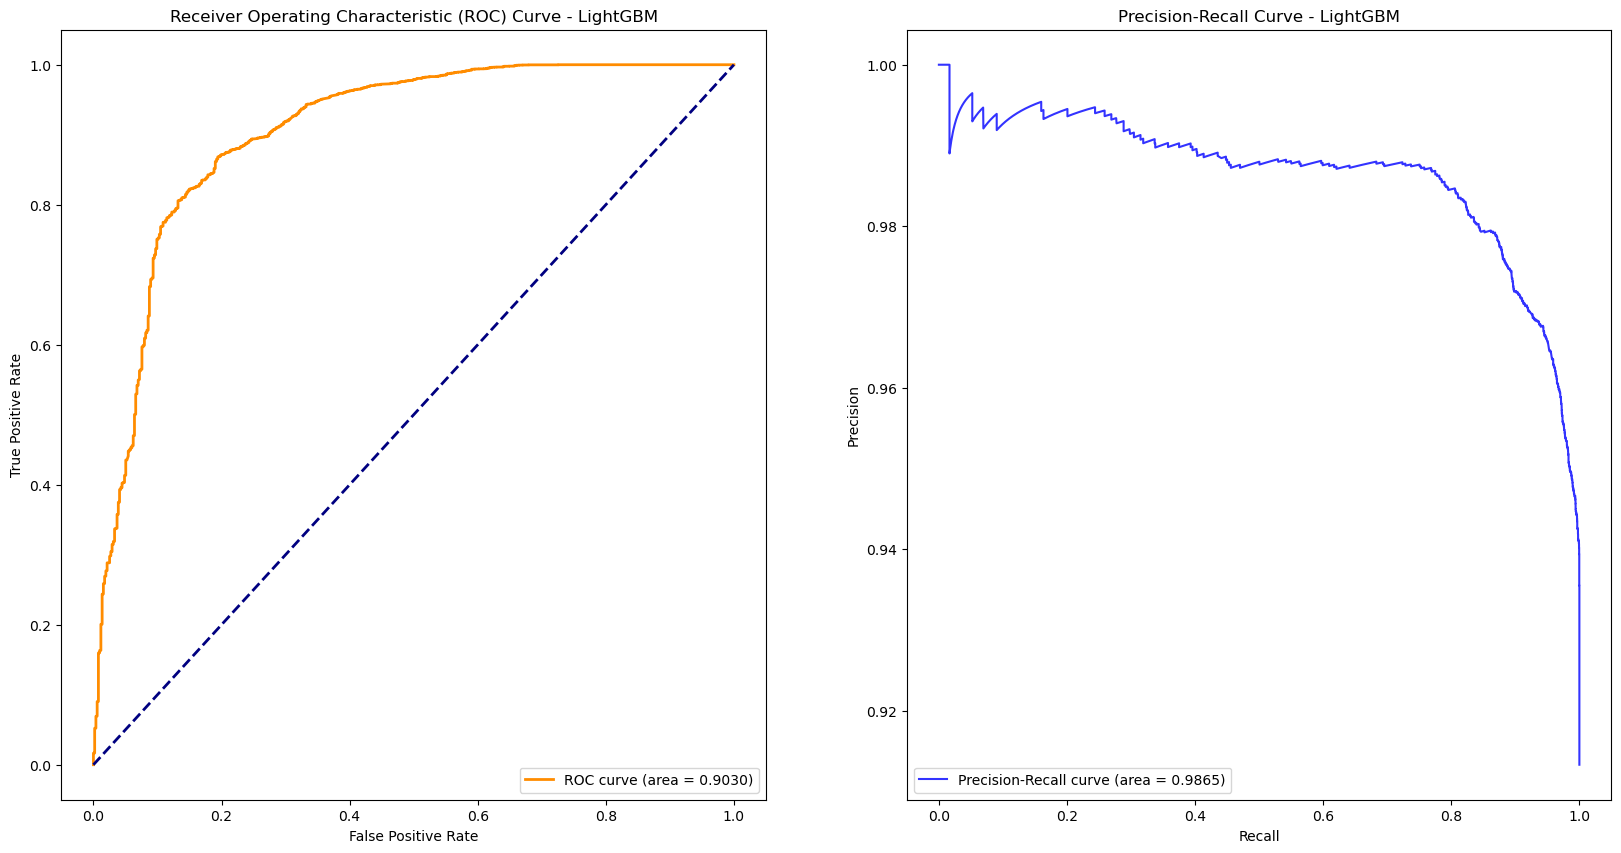

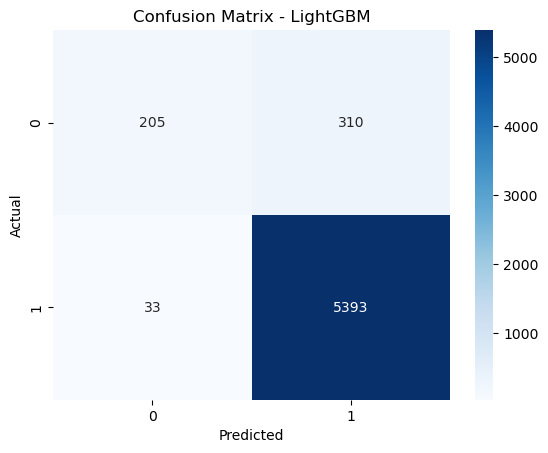

**************************************************
Classifcation Report - LightGBM
**************************************************
              precision    recall  f1-score   support

           0       0.86      0.40      0.54       515
           1       0.95      0.99      0.97      5426

    accuracy                           0.94      5941
   macro avg       0.90      0.70      0.76      5941
weighted avg       0.94      0.94      0.93      5941



In [13]:
best_lgbm = lgb.LGBMClassifier(objective='binary',class_weight= {0: 1.0, 1: 1.0}, n_estimators= 76)

best_lgbm.fit(X_tr_vec, y_tr)
y_pr = best_lgbm.predict(X_te_vec)
y_prob = best_lgbm.predict_proba(X_te_vec)

fpr, tpr, thresholds = roc_curve(y_te, y_prob[:,1])
roc_auc = auc(fpr, tpr)

precision, recall, pthresholds = precision_recall_curve(y_te, y_prob[:, 1])
pr_auc = auc(recall, precision)

fig, ax = plt.subplots(1,2, figsize=(20,10))
# Plot ROC curve

ax[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Receiver Operating Characteristic (ROC) Curve - LightGBM')
ax[0].legend(loc="lower right")

# Plot Precision-Recall curve
ax[1].plot(recall, precision, color='b', alpha=0.8, label='Precision-Recall curve (area = %0.4f)' % pr_auc)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve - LightGBM')
ax[1].legend(loc='lower left')

plt.show();
# Classification report


sns.heatmap(confusion_matrix(y_te, y_pr), cmap='Blues', cbar=True, annot=True, xticklabels= True, yticklabels=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')

plt.show();

print('*'*50)
print('Classifcation Report - LightGBM')
print('*'*50)
print(classification_report(y_te, y_pr))

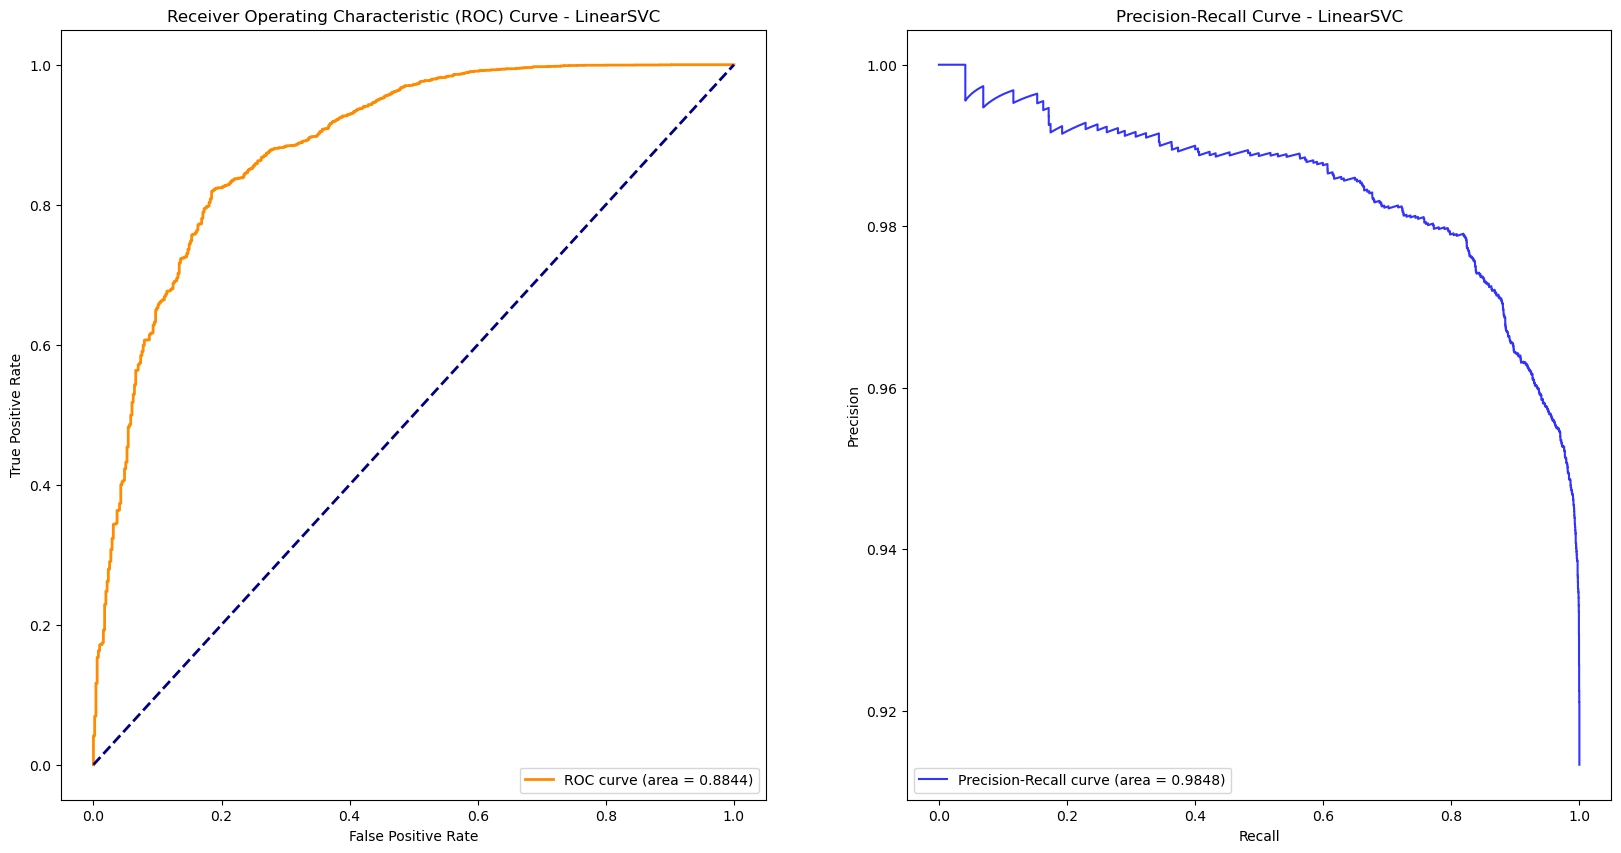

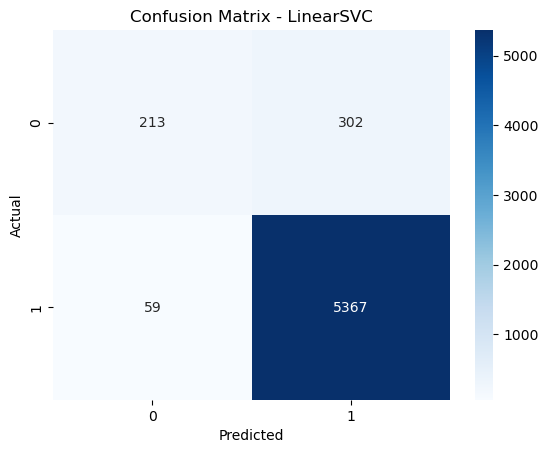

**************************************************
Classifcation Report - LinearSVC
**************************************************
              precision    recall  f1-score   support

           0       0.78      0.41      0.54       515
           1       0.95      0.99      0.97      5426

    accuracy                           0.94      5941
   macro avg       0.86      0.70      0.75      5941
weighted avg       0.93      0.94      0.93      5941



In [14]:
best_svc = LinearSVC(dual='auto', C= 1, class_weight= {0: 1.0, 1: 1.0}, max_iter= 4264)

clf = CalibratedClassifierCV(best_svc) 
clf.fit(X_tr_vec, y_tr)
y_pr = clf.predict(X_te_vec)
y_prob = clf.predict_proba(X_te_vec)

fpr, tpr, thresholds = roc_curve(y_te, y_prob[:,1])
roc_auc = auc(fpr, tpr)


precision, recall, pthresholds = precision_recall_curve(y_te, y_prob[:, 1])
pr_auc = auc(recall, precision)

fig, ax = plt.subplots(1,2, figsize=(20,10))
# Plot ROC curve

ax[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Receiver Operating Characteristic (ROC) Curve - LinearSVC')
ax[0].legend(loc="lower right")

# Plot Precision-Recall curve
ax[1].plot(recall, precision, color='b', alpha=0.8, label='Precision-Recall curve (area = %0.4f)' % pr_auc)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve - LinearSVC')
ax[1].legend(loc='lower left')

plt.show();
# Classification report


sns.heatmap(confusion_matrix(y_te, y_pr), cmap='Blues', cbar=True, annot=True, xticklabels= True, yticklabels=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LinearSVC')

plt.show();

print('*'*50)
print('Classifcation Report - LinearSVC')
print('*'*50)
print(classification_report(y_te, y_pr))

## What a show. LightGBM is marginally ahead in recall of the positive class, AOC ROC, and AOC Precision-Recall. We're going with LightGBM.

#### best_lgbm = lgb.LGBMClassifier(objective='binary',class_weight= {0: 1.0, 1: 1.0}, n_estimators= 76)
